In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# visualization settings
plt.style.use('seaborn-v0_8-whitegrid')  # Use a clean, readable style
sns.set_palette('viridis')  # Use a colorblind-friendly palette
plt.rcParams['figure.figsize'] = (12, 8)  # Set default figure size
plt.rcParams['font.size'] = 12  # Set default font size
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# settings for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.precision', 2)  # Show 2 decimal places

In [23]:
# Loading the original diabetes dataset
data = pd.read_csv("dataset_diabetes/diabetic_data.csv")

# Printing basic information about the dataset
print(f"Dataset dimensions: {data.shape}")
print(f"Number of patient encounters: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")
print("\nFirst 5 rows of the dataset:")
data.head()

Dataset dimensions: (101766, 50)
Number of patient encounters: 101766
Number of features: 50

First 5 rows of the dataset:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [24]:
# Geting information about data types and missing values
print("Data types and missing values summary:")
data_info = pd.DataFrame({
    'Data Type': data.dtypes,
    'Non-Null Count': data.count(),
    'Missing Values': data.isnull().sum(),
    'Missing Percentage': round(data.isnull().sum() / len(data) * 100, 2)
})

# Sorting by missing percentage to identify problematic columns
data_info_sorted = data_info.sort_values('Missing Percentage', ascending=False)
data_info_sorted.head(15)  # Show the 15 columns with the most missing data

Data types and missing values summary:


,Data Type,Non-Null Count,Missing Values,Missing Percentage
max_glu_serum,object,5346,96420,94.75
A1Cresult,object,17018,84748,83.28
race,object,101766,0,0.00
gender,object,101766,0,0.00
age,object,101766,0,0.00
weight,object,101766,0,0.00
admission_type_id,int64,101766,0,0.00
discharge_disposition_id,int64,101766,0,0.00
admission_source_id,int64,101766,0,0.00
time_in_hospital,int64,101766,0,0.00


In [25]:
# Replacing '?' with np.nan for proper handling of missing values
data.replace('?', np.nan, inplace=True)

# Printing missing values after replacing '?'
print("\nMissing values after replacing '?' with NaN:")
missing_after = data.isnull().sum()
missing_percent = (missing_after / len(data) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_after, 'Missing Percentage': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))


Missing values after replacing '?' with NaN:
                   Missing Count  Missing Percentage
weight                     98569               96.86
max_glu_serum              96420               94.75
A1Cresult                  84748               83.28
medical_specialty          49949               49.08
payer_code                 40256               39.56
race                        2273                2.23
diag_3                      1423                1.40
diag_2                       358                0.35
diag_1                        21                0.02


In [26]:
# Decoding ID fields using mapping dictionaries (same as in your preprocessing script)
# Admission type mapping
admission_type_dict = {
    1: 'Emergency', 2: 'Urgent', 3: 'Elective', 4: 'Newborn',
    5: 'Not Available', 6: np.nan, 7: 'Trauma Center', 8: 'Not Mapped'
}
data['admission_type'] = data['admission_type_id'].map(admission_type_dict)

# Discharge disposition mapping
discharge_disposition_dict = {
    1: 'Discharged to home',
    2: 'Discharged/transferred to another short term hospital',
    3: 'Discharged/transferred to SNF',
    4: 'Discharged/transferred to ICF',
    5: 'Discharged/transferred to another type of inpatient care institution',
    6: 'Discharged/transferred to home with home health service',
    7: 'Left AMA',
    8: 'Discharged/transferred to home under care of Home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'Neonate discharged to another hospital for neonatal aftercare',
    11: 'Expired',
    12: 'Still patient or expected to return for outpatient services',
    13: 'Hospice / home',
    14: 'Hospice / medical facility',
    15: 'Discharged/transferred within this institution to Medicare approved swing bed',
    16: 'Discharged/transferred/referred another institution for outpatient services',
    17: 'Discharged/transferred/referred to this institution for outpatient services',
    18: np.nan,
    19: 'Expired at home. Medicaid only, hospice.',
    20: 'Expired in a medical facility. Medicaid only, hospice.',
    21: 'Expired, place unknown. Medicaid only, hospice.',
    22: 'Discharged/transferred to another rehab fac including rehab units of a hospital.',
    23: 'Discharged/transferred to a long term care hospital.',
    24: 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
    25: 'Not Mapped',
    26: 'Unknown/Invalid',
    30: 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
    27: 'Discharged/transferred to a federal health care facility.',
    28: 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    29: 'Discharged/transferred to a Critical Access Hospital (CAH).'
}
data['discharge_disposition'] = data['discharge_disposition_id'].map(discharge_disposition_dict)

# Admission source mapping
admission_source_dict = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from a hospital',
    5: 'Transfer from a Skilled Nursing Facility (SNF)',
    6: 'Transfer from another health care facility',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    9: 'Not Available',
    10: 'Transfer from critial access hospital',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
    15: 'Not Available',
    17: np.nan,
    18: 'Transfer From Another Home Health Agency',
    19: 'Readmission to Same Home Health Agency',
    20: 'Not Mapped',
    21: 'Unknown/Invalid',
    22: 'Transfer from hospital inpt/same fac reslt in a sep claim',
    23: 'Born inside this hospital',
    24: 'Born outside this hospital',
    25: 'Transfer from Ambulatory Surgery Center',
    26: 'Transfer from Hospice'
}
data['admission_source'] = data['admission_source_id'].map(admission_source_dict)

# Printing samples of decoded data
print("\nSample of decoded admission types:")
print(data[['admission_type_id', 'admission_type']].head())
print("\nSample of decoded discharge dispositions:")
print(data[['discharge_disposition_id', 'discharge_disposition']].head())
print("\nSample of decoded admission sources:")
print(data[['admission_source_id', 'admission_source']].head())


Sample of decoded admission types:
   admission_type_id admission_type
0                  6            NaN
1                  1      Emergency
2                  1      Emergency
3                  1      Emergency
4                  1      Emergency

Sample of decoded discharge dispositions:
   discharge_disposition_id discharge_disposition
0                        25            Not Mapped
1                         1    Discharged to home
2                         1    Discharged to home
3                         1    Discharged to home
4                         1    Discharged to home

Sample of decoded admission sources:
   admission_source_id    admission_source
0                    1  Physician Referral
1                    7      Emergency Room
2                    7      Emergency Room
3                    7      Emergency Room
4                    7      Emergency Room


Distribution of Readmission Status:
            Count  Percentage (%)
readmitted                       
NO          54864           53.91
>30         35545           34.93
<30         11357           11.16


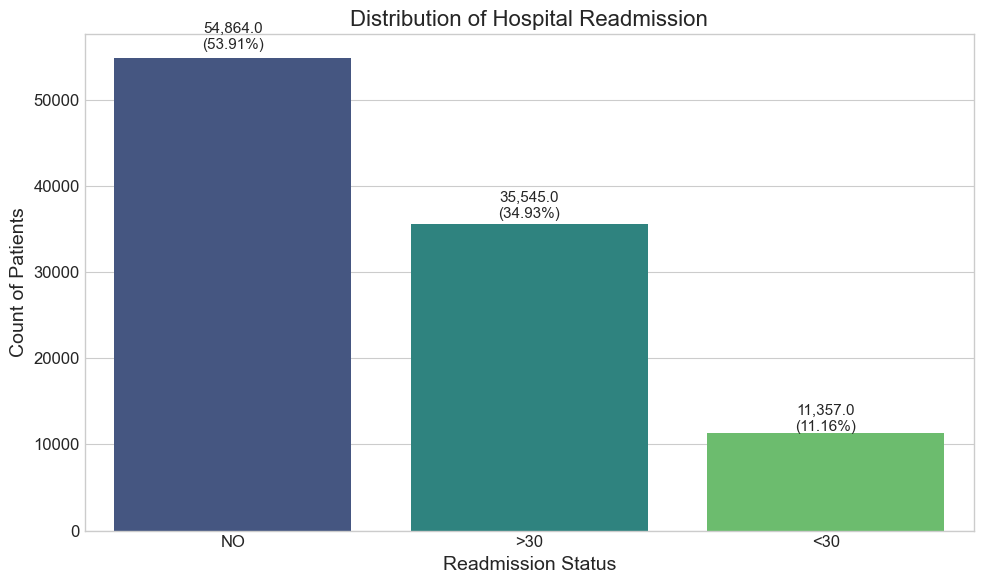

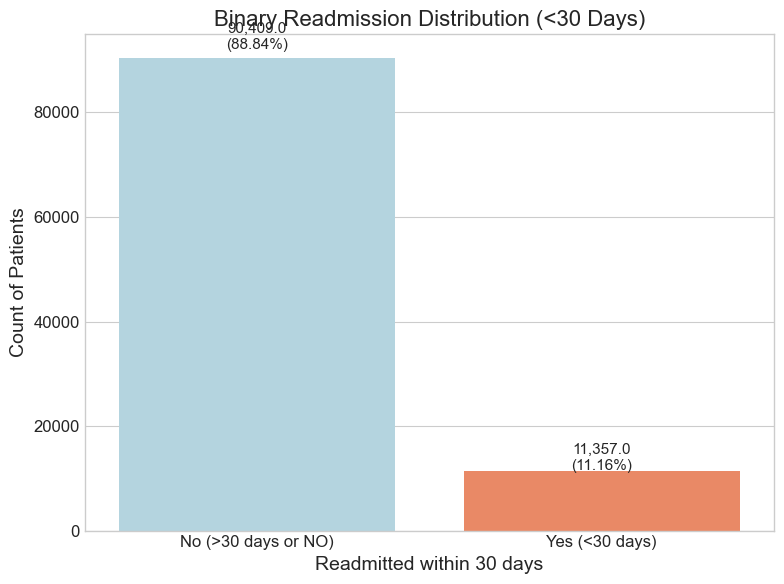

In [27]:
# A binary version of the target for later analysis (as mentioned in the requirements)
# <30 days = 1, others (NO and >30) = 0
data['readmitted_binary'] = (data['readmitted'] == '<30').astype(int)

# Analyzing the target variable 'readmitted'
readmitted_counts = data['readmitted'].value_counts()
readmitted_percent = (data['readmitted'].value_counts(normalize=True) * 100).round(2)

# Summary dataframe
readmission_summary = pd.DataFrame({
    'Count': readmitted_counts,
    'Percentage (%)': readmitted_percent
})

print("Distribution of Readmission Status:")
print(readmission_summary)

# visual representation
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='readmitted', data=data, palette='viridis')

# Adding count and percentage labels to the bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = readmitted_percent.iloc[i] if i < len(readmitted_percent) else 0
    ax.annotate(f"{height:,}\n({percentage}%)", 
                (p.get_x() + p.get_width() / 2., height * 1.02),
                ha='center', va='baseline', fontsize=11)

plt.title('Distribution of Hospital Readmission', fontsize=16)
plt.xlabel('Readmission Status', fontsize=14)
plt.ylabel('Count of Patients', fontsize=14)
plt.tight_layout()
plt.show()

# the binary distribution
binary_counts = data['readmitted_binary'].value_counts()
binary_percent = (binary_counts / len(data) * 100).round(2)

# visual representation of the binary target
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='readmitted_binary', data=data, palette=['lightblue', 'coral'])

# Adding count and percentage labels
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = binary_percent.iloc[i] if i < len(binary_percent) else 0
    ax.annotate(f"{height:,}\n({percentage}%)", 
                (p.get_x() + p.get_width() / 2., height * 1.02),
                ha='center', va='baseline', fontsize=11)

plt.title('Binary Readmission Distribution (<30 Days)', fontsize=16)
plt.xlabel('Readmitted within 30 days', fontsize=14)
plt.ylabel('Count of Patients', fontsize=14)
plt.xticks([0, 1], ['No (>30 days or NO)', 'Yes (<30 days)'])
plt.tight_layout()
plt.show()

In [28]:
# function to calculate readmission rates by category
def calculate_readmission_rate(df, feature):
    """Calculate readmission rates for each category of a feature"""
    # Counting occurrences for each combination of feature and readmission status
    grouped = df.groupby([feature, 'readmitted']).size().unstack(fill_value=0)
    
    # Calculating total count for each category
    grouped['total'] = grouped.sum(axis=1)
    
    # Calculating readmission rates
    grouped['<30_days_rate'] = (grouped['<30'] / grouped['total'] * 100).round(2)
    grouped['>30_days_rate'] = (grouped['>30'] / grouped['total'] * 100).round(2)
    grouped['total_readmission_rate'] = ((grouped['<30'] + grouped['>30']) / grouped['total'] * 100).round(2)
    
    # rates and counts
    return grouped[['<30_days_rate', '>30_days_rate', 'total_readmission_rate', 'total']]

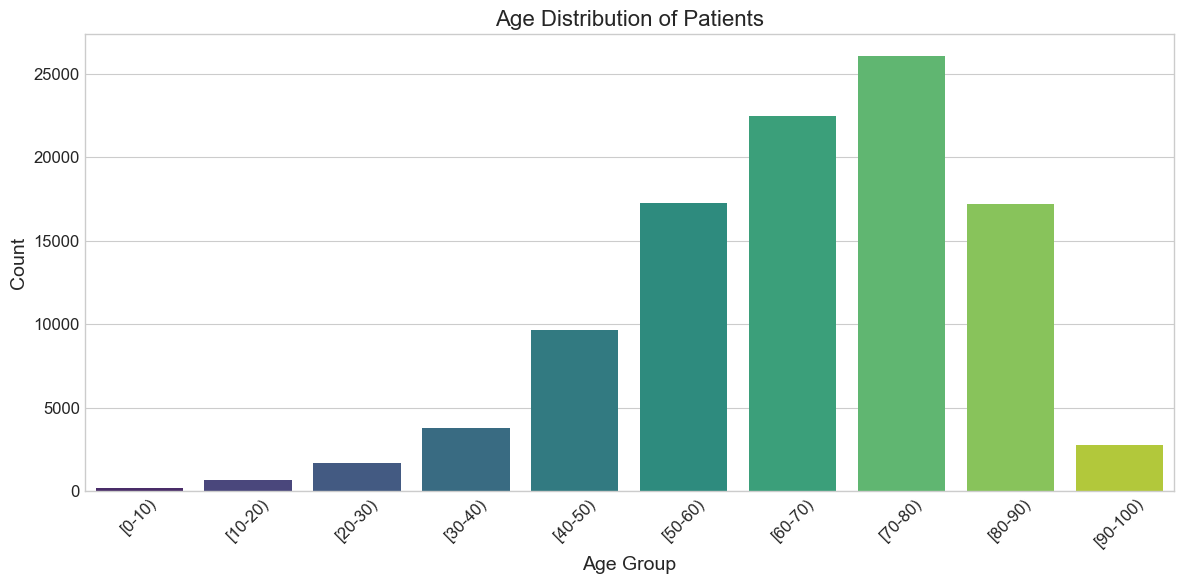

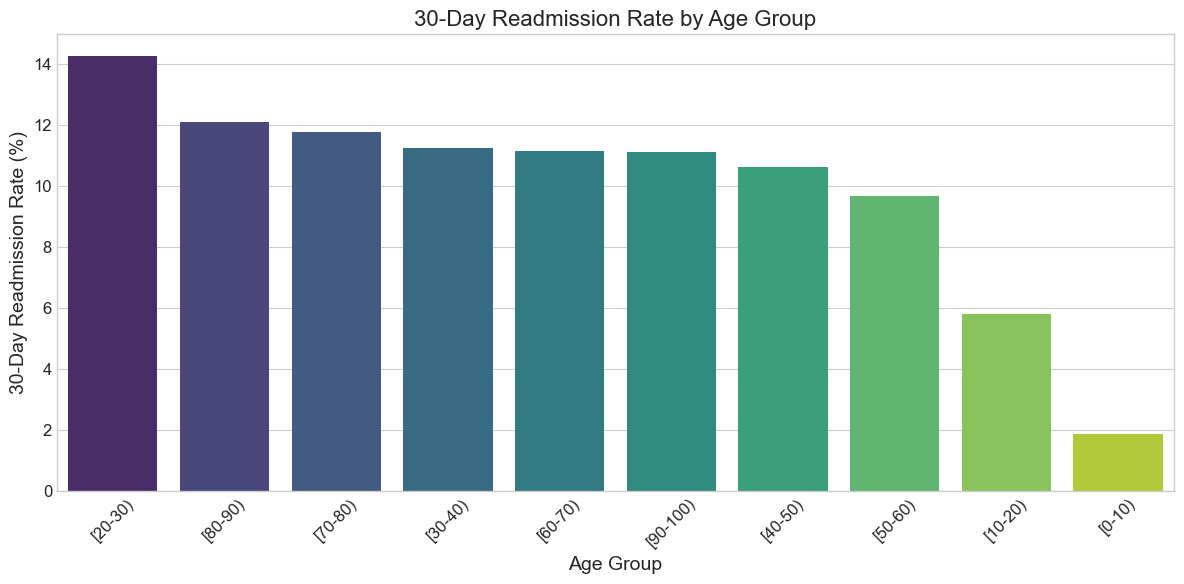

Readmission Rates by Age Group (sorted by 30-day readmission rate):
readmitted  <30_days_rate  >30_days_rate  total_readmission_rate  total
age                                                                    
[20-30)             14.24          30.78                   45.02   1657
[80-90)             12.08          36.19                   48.27  17197
[70-80)             11.77          36.35                   48.12  26068
[30-40)             11.23          31.44                   42.68   3775
[60-70)             11.13          35.12                   46.25  22483
[90-100)            11.10          28.93                   40.03   2793
[40-50)             10.60          33.85                   44.45   9685
[50-60)              9.67          34.29                   43.96  17256
[10-20)              5.79          32.42                   38.21    691
[0-10)               1.86          16.15                   18.01    161


In [29]:
# Analyzing age distribution
plt.figure(figsize=(12, 6))
age_counts = data['age'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
plt.title('Age Distribution of Patients', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating and visualizing readmission rates by age
age_readmission = calculate_readmission_rate(data, 'age')
age_readmission = age_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=age_readmission.index, y=age_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Readmission Rates by Age Group (sorted by 30-day readmission rate):")
print(age_readmission)

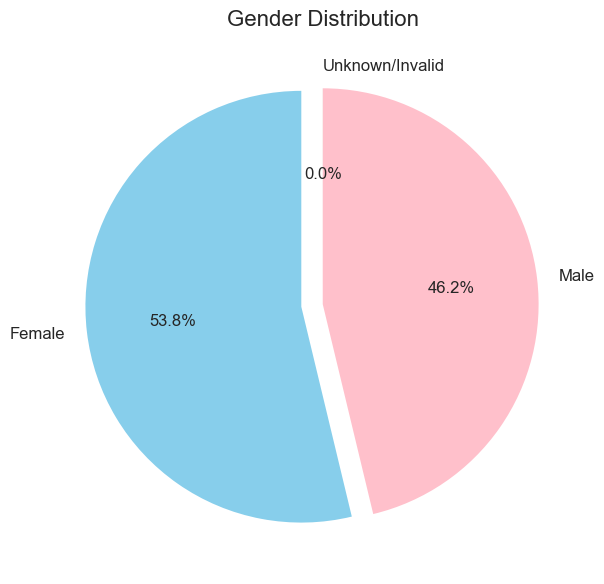

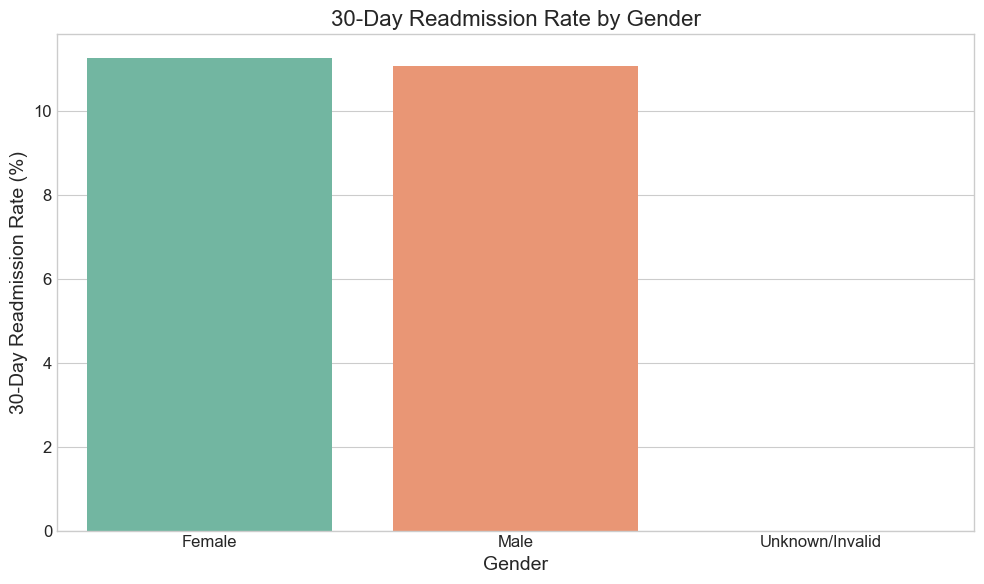

Readmission Rates by Gender:
readmitted       <30_days_rate  >30_days_rate  total_readmission_rate  total
gender                                                                      
Female                   11.25          35.68                   46.92  54708
Male                     11.06          34.06                   45.12  47055
Unknown/Invalid           0.00           0.00                    0.00      3


In [30]:
# Analyzing gender distribution
plt.figure(figsize=(10, 6))
gender_counts = data['gender'].value_counts()
# the different numbers of gender categories handling
explode = [0.1] + [0] * (len(gender_counts) - 1)  # Explode the first piece (largest)

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
        startangle=90, explode=explode, colors=['skyblue', 'pink', 'lightgreen'][:len(gender_counts)])
plt.title('Gender Distribution', fontsize=16)
plt.tight_layout()
plt.show()

# Calculating and visualizing readmission by gender
gender_readmission = calculate_readmission_rate(data, 'gender')

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_readmission.index, y=gender_readmission['<30_days_rate'], palette='Set2')
plt.title('30-Day Readmission Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()

print("Readmission Rates by Gender:")
print(gender_readmission)

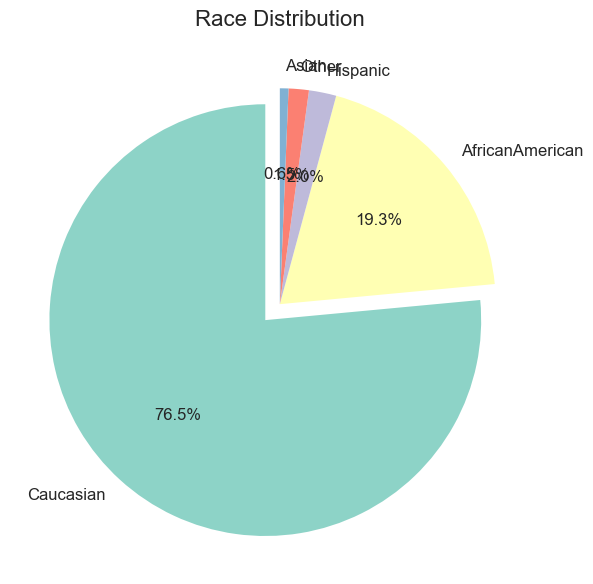

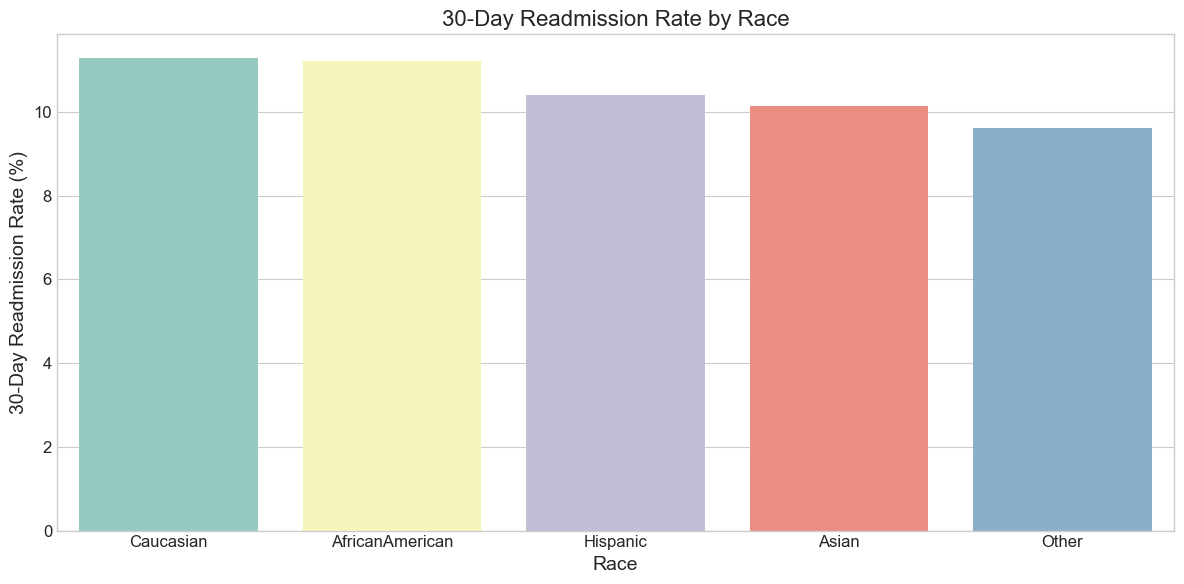

Readmission Rates by Race (sorted by 30-day readmission rate):
readmitted       <30_days_rate  >30_days_rate  total_readmission_rate  total
race                                                                        
Caucasian                11.29          35.64                   46.93  76099
AfricanAmerican          11.22          34.53                   45.75  19210
Hispanic                 10.41          31.52                   41.92   2037
Asian                    10.14          25.12                   35.26    641
Other                     9.63          29.61                   39.24   1506


In [31]:
# Analyzing race distribution
plt.figure(figsize=(10, 6))
race_counts = data['race'].value_counts()
explode = [0.1] + [0] * (len(race_counts) - 1)  # Explode the largest piece

plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', 
        startangle=90, explode=explode, colors=sns.color_palette('Set3', len(race_counts)))
plt.title('Race Distribution', fontsize=16)
plt.tight_layout()
plt.show()

# Calculating and visualizing readmission by race
race_readmission = calculate_readmission_rate(data, 'race')
race_readmission = race_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=race_readmission.index, y=race_readmission['<30_days_rate'], palette='Set3')
plt.title('30-Day Readmission Rate by Race', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()

print("Readmission Rates by Race (sorted by 30-day readmission rate):")
print(race_readmission)

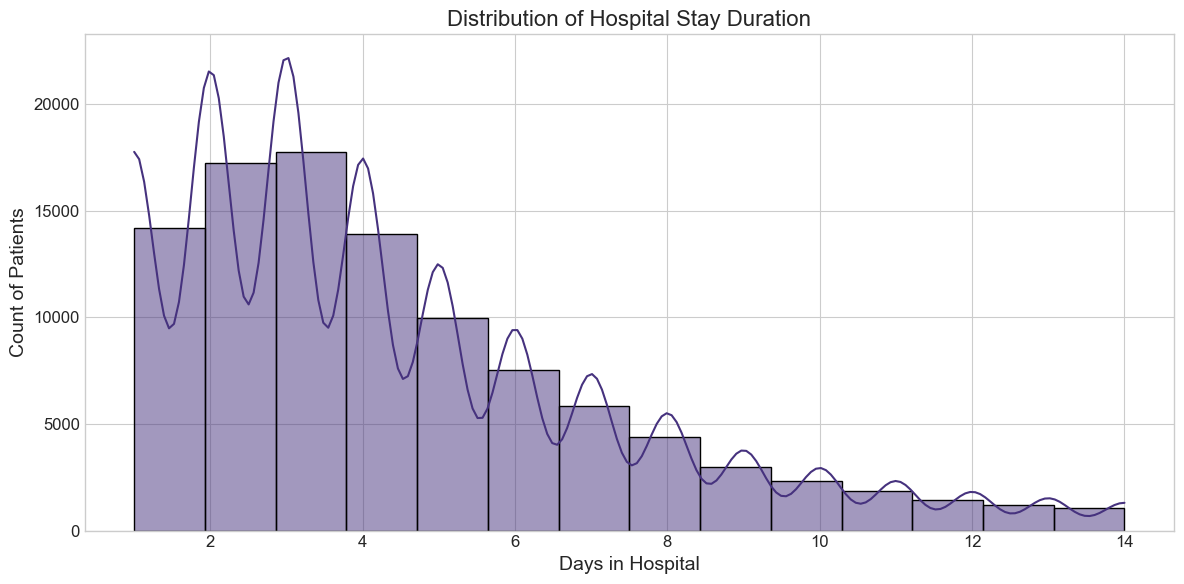

Summary Statistics for Hospital Stay Duration:
count    101766.00
mean          4.40
std           2.99
min           1.00
25%           2.00
50%           4.00
75%           6.00
max          14.00
Name: time_in_hospital, dtype: float64


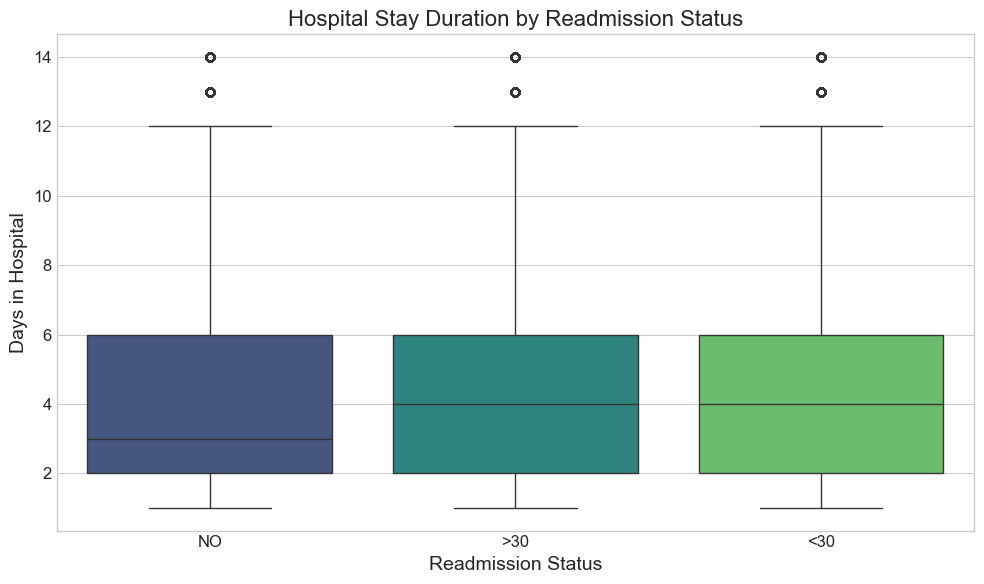

Hospital Stay Statistics by Readmission Status:
            mean  median   std
readmitted                    
<30         4.77     4.0  3.03
>30         4.50     4.0  2.99
NO          4.25     3.0  2.96

ANOVA test for hospital stay differences: F-statistic = 170.33, p-value = 0.0000000000
Conclusion: Statistically significant difference


In [32]:
# Analyzing the distribution of hospital stay duration
plt.figure(figsize=(12, 6))
sns.histplot(data['time_in_hospital'], bins=14, kde=True)
plt.title('Distribution of Hospital Stay Duration', fontsize=16)
plt.xlabel('Days in Hospital', fontsize=14)
plt.ylabel('Count of Patients', fontsize=14)
plt.tight_layout()
plt.show()

# statistics of hospital stay summary
stay_stats = data['time_in_hospital'].describe()
print("Summary Statistics for Hospital Stay Duration:")
print(stay_stats)

# Analyzing relationship between hospital stay and readmission
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=data, palette='viridis')
plt.title('Hospital Stay Duration by Readmission Status', fontsize=16)
plt.xlabel('Readmission Status', fontsize=14)
plt.ylabel('Days in Hospital', fontsize=14)
plt.tight_layout()
plt.show()

# Calculating average hospital stay by readmission status
stay_by_readmission = data.groupby('readmitted')['time_in_hospital'].agg(['mean', 'median', 'std']).round(2)
print("Hospital Stay Statistics by Readmission Status:")
print(stay_by_readmission)

# ANOVA test to check if differences are statistically significant
groups = [data[data['readmitted'] == status]['time_in_hospital'] for status in data['readmitted'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print(f"\nANOVA test for hospital stay differences: F-statistic = {f_stat:.2f}, p-value = {p_val:.10f}")
print(f"Conclusion: {'Statistically significant difference' if p_val < 0.05 else 'No statistically significant difference'}")

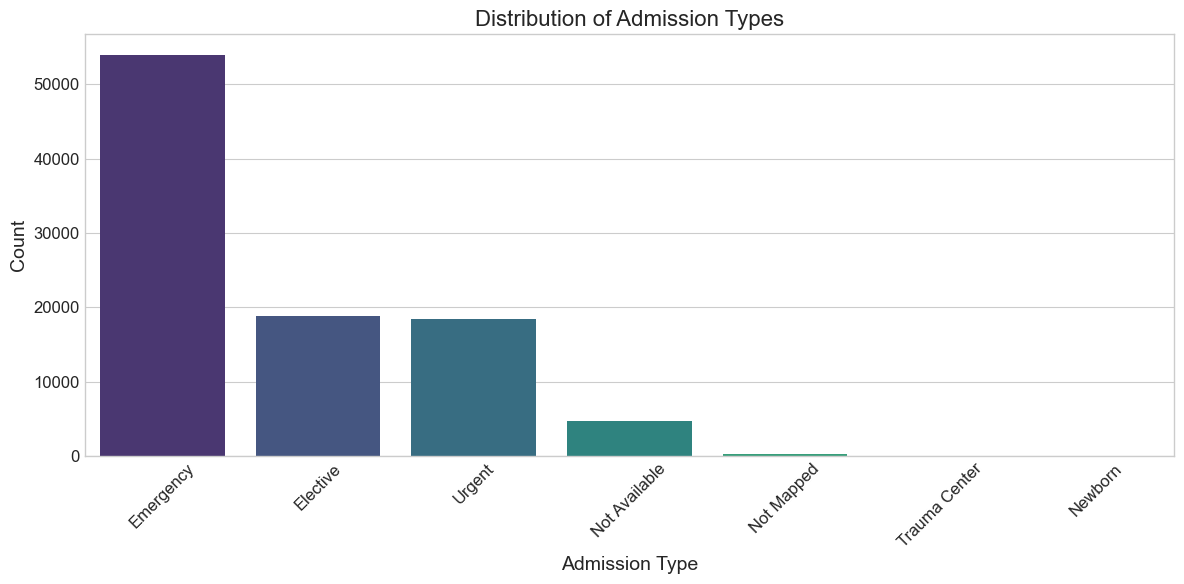

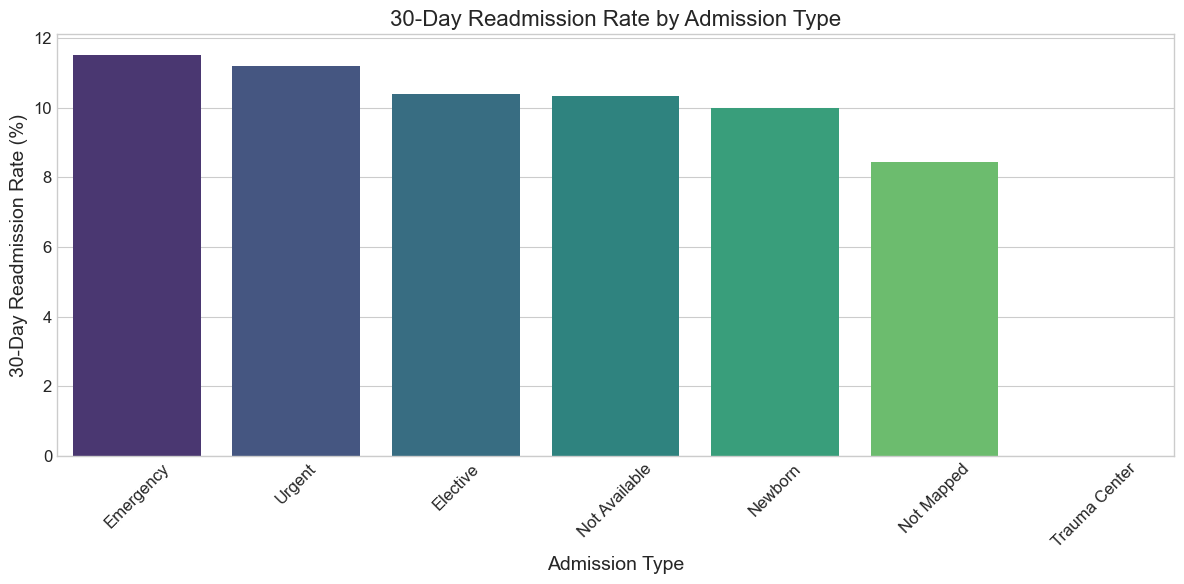

Readmission Rates by Admission Type (sorted by 30-day readmission rate):
readmitted      <30_days_rate  >30_days_rate  total_readmission_rate  total
admission_type                                                             
Emergency               11.52          35.76                   47.29  53990
Urgent                  11.18          34.91                   46.09  18480
Elective                10.39          30.45                   40.84  18869
Not Available           10.34          35.97                   46.31   4785
Newborn                 10.00          20.00                   30.00     10
Not Mapped               8.44          26.25                   34.69    320
Trauma Center            0.00           0.00                    0.00     21


In [33]:
# Analyzing admission types
plt.figure(figsize=(12, 6))
# First, handling missing values by dropping them
valid_admission_data = data.dropna(subset=['admission_type'])
admission_counts = valid_admission_data['admission_type'].value_counts()
sns.barplot(x=admission_counts.index, y=admission_counts.values, palette='viridis')
plt.title('Distribution of Admission Types', fontsize=16)
plt.xlabel('Admission Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating readmission rates by admission type
# Filtering out NaN values
valid_admission = data.dropna(subset=['admission_type'])
admission_readmission = calculate_readmission_rate(valid_admission, 'admission_type')
admission_readmission = admission_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=admission_readmission.index, y=admission_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Admission Type', fontsize=16)
plt.xlabel('Admission Type', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Readmission Rates by Admission Type (sorted by 30-day readmission rate):")
print(admission_readmission)

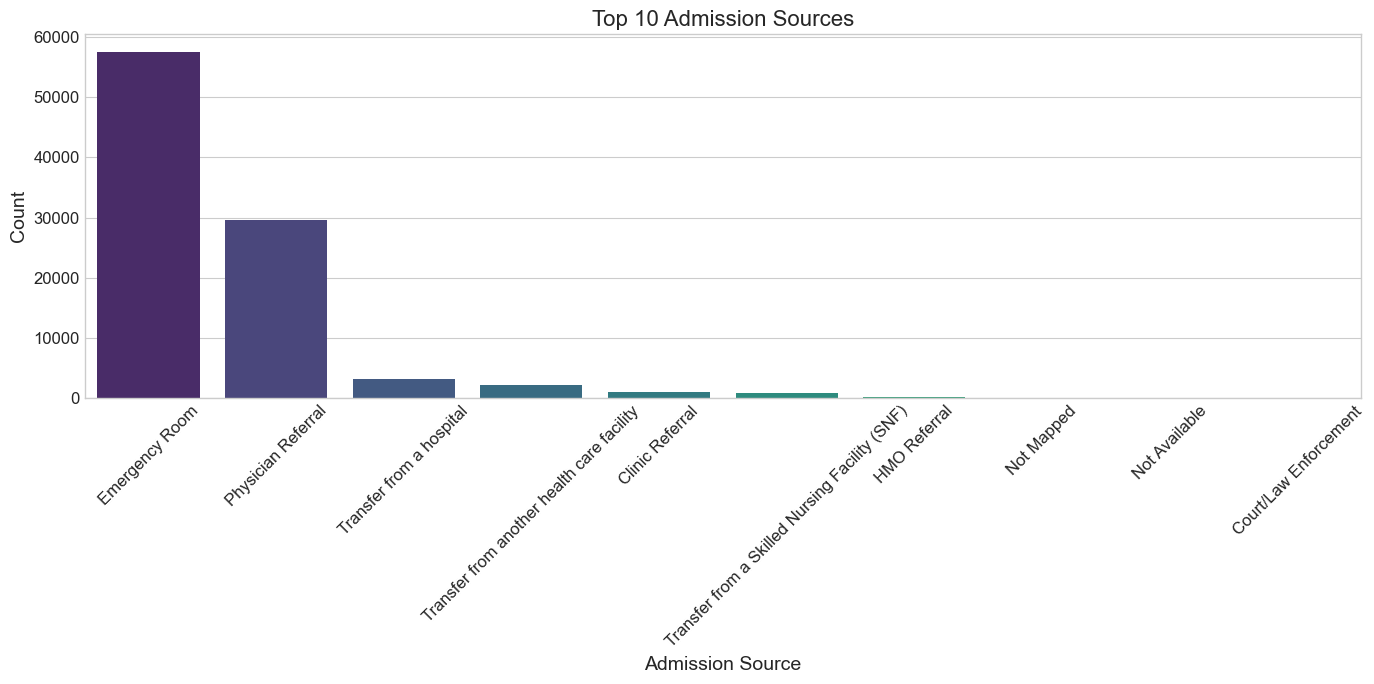

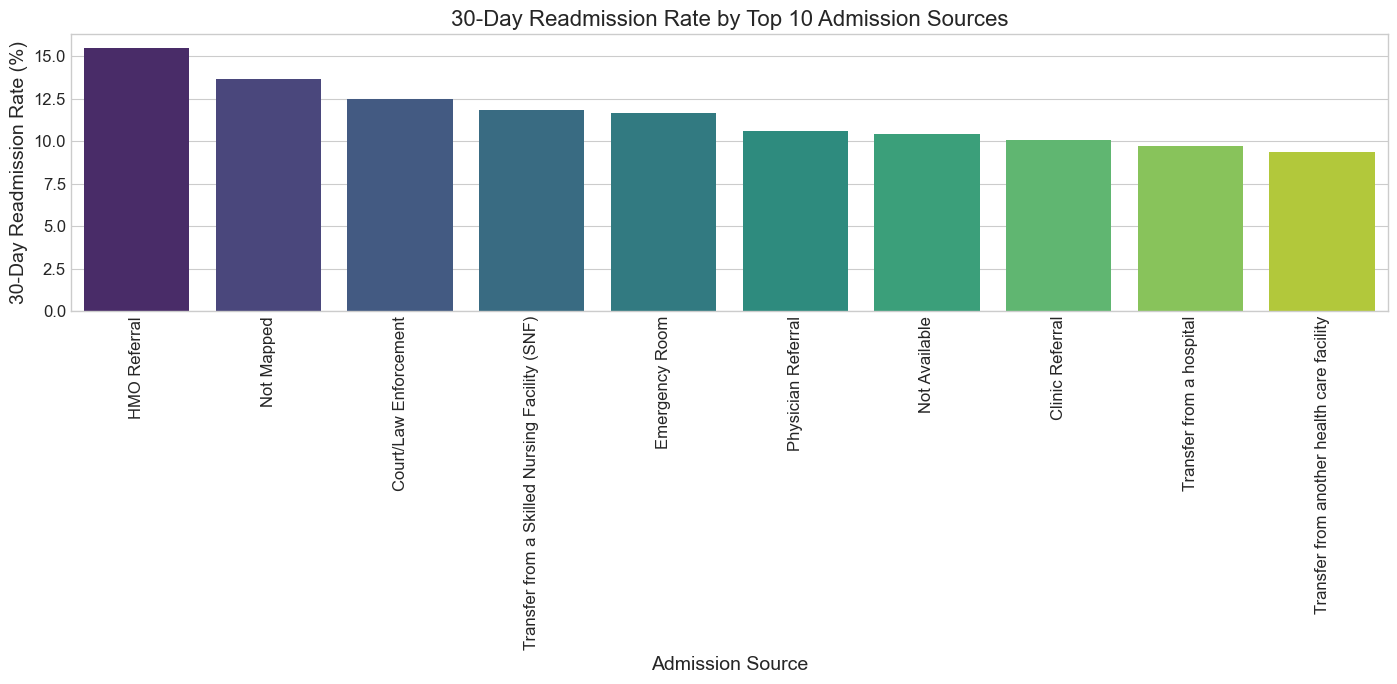

Readmission Rates by Top 10 Admission Sources (sorted by 30-day readmission rate):
readmitted                                      <30_days_rate  >30_days_rate  \
admission_source                                                               
HMO Referral                                            15.51          31.02   
Not Mapped                                              13.66          50.31   
Court/Law Enforcement                                   12.50          25.00   
Transfer from a Skilled Nursing Facility (SNF)          11.81          27.60   
Emergency Room                                          11.69          37.69   
Physician Referral                                      10.59          32.61   
Not Available                                           10.40          12.80   
Clinic Referral                                         10.05          28.08   
Transfer from a hospital                                 9.70          21.09   
Transfer from another health care fac

In [34]:
# Analyzing admission sources
# Getting top 10 admission sources for better visualization
valid_source_data = data.dropna(subset=['admission_source'])
top_sources = valid_source_data['admission_source'].value_counts().nlargest(10).index
plt.figure(figsize=(14, 7))
source_counts = valid_source_data[valid_source_data['admission_source'].isin(top_sources)]['admission_source'].value_counts()
sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')
plt.title('Top 10 Admission Sources', fontsize=16)
plt.xlabel('Admission Source', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating readmission rates by admission source (top 10)
source_data = valid_source_data[valid_source_data['admission_source'].isin(top_sources)]
source_readmission = calculate_readmission_rate(source_data, 'admission_source')
source_readmission = source_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=source_readmission.index, y=source_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Top 10 Admission Sources', fontsize=16)
plt.xlabel('Admission Source', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Readmission Rates by Top 10 Admission Sources (sorted by 30-day readmission rate):")
print(source_readmission)

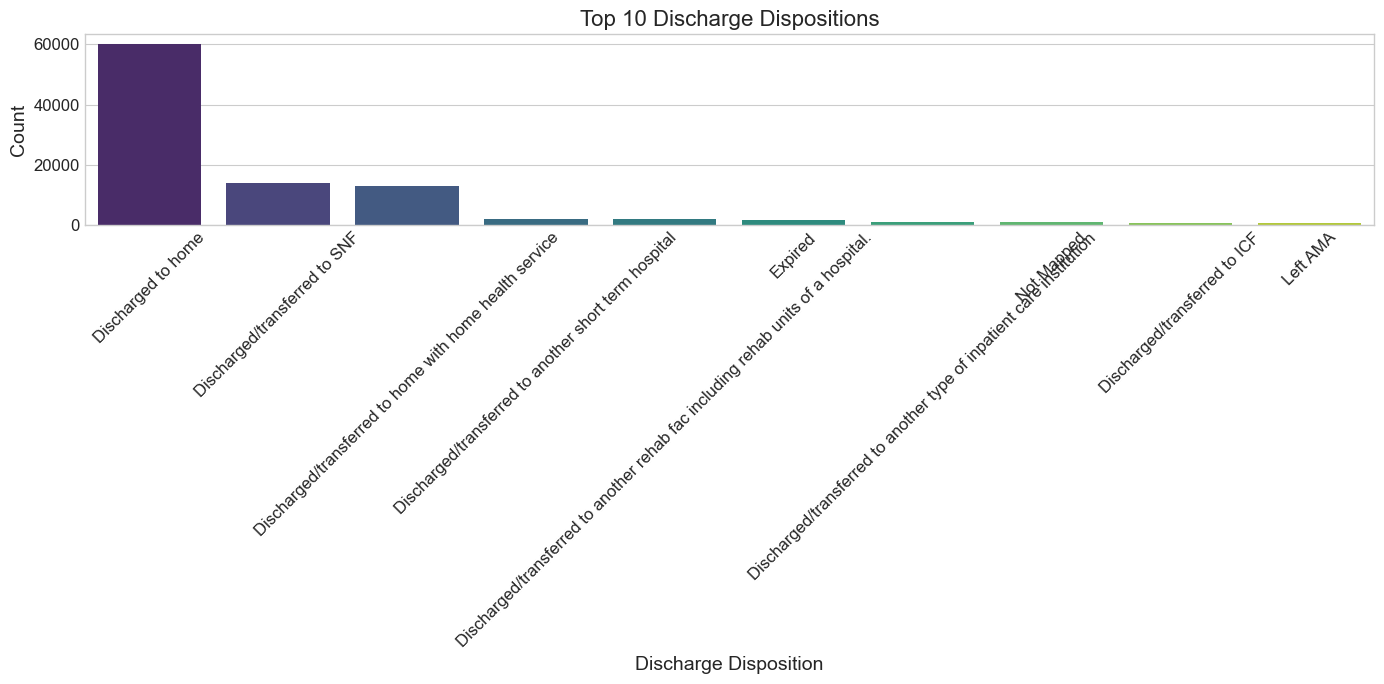

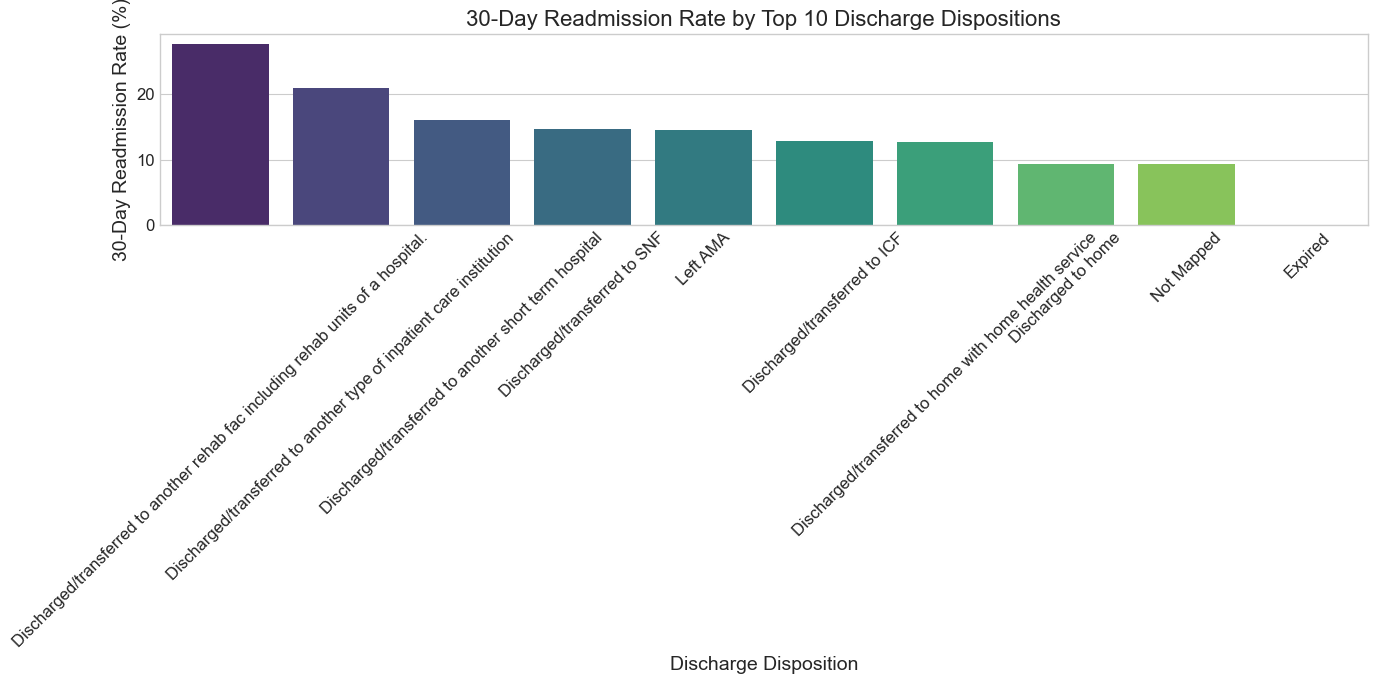

Readmission Rates by Top 10 Discharge Dispositions (sorted by 30-day readmission rate):
readmitted                                          <30_days_rate  \
discharge_disposition                                               
Discharged/transferred to another rehab fac inc...          27.70   
Discharged/transferred to another type of inpat...          20.86   
Discharged/transferred to another short term ho...          16.07   
Discharged/transferred to SNF                               14.66   
Left AMA                                                    14.45   
Discharged/transferred to ICF                               12.76   
Discharged/transferred to home with home health...          12.70   
Discharged to home                                           9.30   
Not Mapped                                                   9.30   
Expired                                                      0.00   

readmitted                                          >30_days_rate  \
discharge_disp

In [35]:
# Analyzing discharge dispositions
# Getting top 10 discharge dispositions for better visualization
valid_discharge_data = data.dropna(subset=['discharge_disposition'])
top_dispositions = valid_discharge_data['discharge_disposition'].value_counts().nlargest(10).index
plt.figure(figsize=(14, 7))
disposition_counts = valid_discharge_data[valid_discharge_data['discharge_disposition'].isin(top_dispositions)]['discharge_disposition'].value_counts()
sns.barplot(x=disposition_counts.index, y=disposition_counts.values, palette='viridis')
plt.title('Top 10 Discharge Dispositions', fontsize=16)
plt.xlabel('Discharge Disposition', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating readmission rates by discharge disposition (top 10)
disposition_data = valid_discharge_data[valid_discharge_data['discharge_disposition'].isin(top_dispositions)]
disposition_readmission = calculate_readmission_rate(disposition_data, 'discharge_disposition')
disposition_readmission = disposition_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=disposition_readmission.index, y=disposition_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Top 10 Discharge Dispositions', fontsize=16)
plt.xlabel('Discharge Disposition', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Readmission Rates by Top 10 Discharge Dispositions (sorted by 30-day readmission rate):")
print(disposition_readmission)

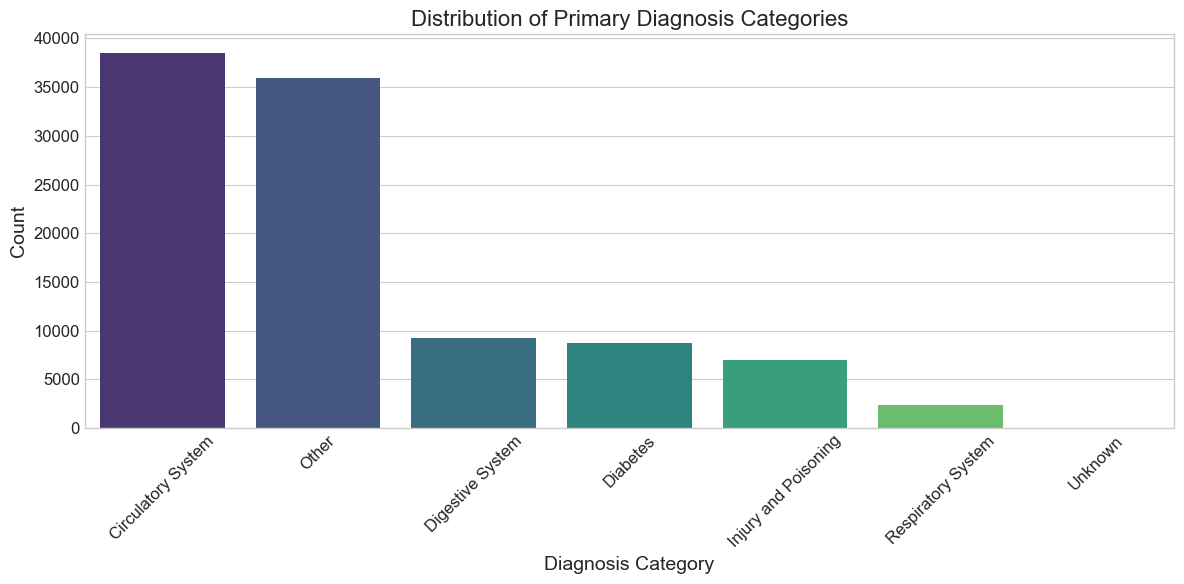

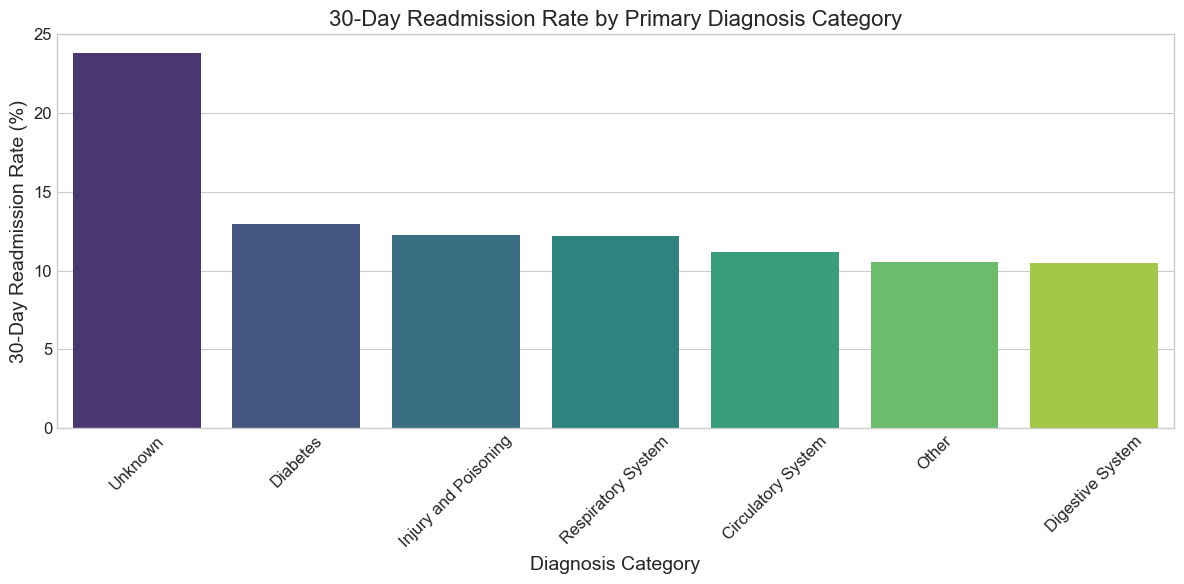

Readmission Rates by Primary Diagnosis Category (sorted by 30-day readmission rate):
readmitted            <30_days_rate  >30_days_rate  total_readmission_rate  \
diag_1_category                                                              
Unknown                       23.81          19.05                   42.86   
Diabetes                      12.98          37.89                   50.87   
Injury and Poisoning          12.25          32.08                   44.32   
Respiratory System            12.20          30.23                   42.43   
Circulatory System            11.19          37.01                   48.20   
Other                         10.57          32.72                   43.29   
Digestive System              10.49          35.44                   45.93   

readmitted            total  
diag_1_category              
Unknown                  21  
Diabetes               8757  
Injury and Poisoning   6974  
Respiratory System     2352  
Circulatory System    38477  
Ot

In [ ]:
# Function to categorize diagnosis codes (as mentioned in the research paper)
def categorize_diagnosis(code):
    """Categorize ICD-9 diagnosis codes into major disease groups"""
    try:
        # Handling missing values
        if pd.isna(code) or code == 'nan' or code == '?':
            return 'Unknown'
            
        # Converting to string and remove decimal points if needed
        code_str = str(code).split('.')[0]
        
        # Categorizing based on ICD-9 code ranges
        if code_str.startswith('250'):
            return 'Diabetes'
        elif code_str.startswith(('390', '391', '392', '393', '394', '395', '396', '397', '398', '399')) or \
             (code_str.startswith('4') and len(code_str) >= 2):
            return 'Circulatory System'
        elif code_str.startswith(('460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '470', '471', '472', '473', '474', '475', '476', '477', '478', '479', '480', '481', '482', '483', '484', '485', '486', '487', '488', '489', '490', '491', '492', '493', '494', '495', '496', '497', '498', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519')):
            return 'Respiratory System'
        elif code_str.startswith(('520', '521', '522', '523', '524', '525', '526', '527', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538', '539', '540', '541', '542', '543', '544', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '577', '578', '579')):
            return 'Digestive System'
        elif code_str.startswith(('800', '801', '802', '803', '804', '805', '806', '807', '808', '809')) or \
             (code_str.startswith('8') and len(code_str) >= 3) or \
             (code_str.startswith('9') and len(code_str) >= 3):
            return 'Injury and Poisoning'
        else:
            return 'Other'
    except:
        return 'Unknown'

# Applying categorization to primary diagnosis
data['diag_1_category'] = data['diag_1'].apply(categorize_diagnosis)

# Visualizing distribution of primary diagnosis categories
plt.figure(figsize=(12, 6))
diag_counts = data['diag_1_category'].value_counts()
sns.barplot(x=diag_counts.index, y=diag_counts.values, palette='viridis')
plt.title('Distribution of Primary Diagnosis Categories', fontsize=16)
plt.xlabel('Diagnosis Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating readmission rates by primary diagnosis category
diag_readmission = calculate_readmission_rate(data, 'diag_1_category')
diag_readmission = diag_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=diag_readmission.index, y=diag_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Primary Diagnosis Category', fontsize=16)
plt.xlabel('Diagnosis Category', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Readmission Rates by Primary Diagnosis Category (sorted by 30-day readmission rate):")
print(diag_readmission)

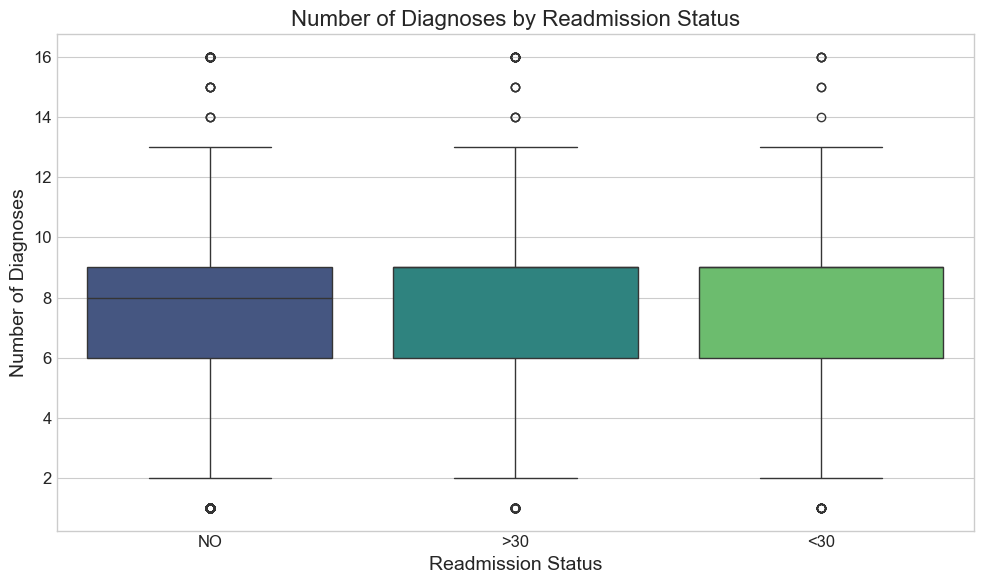

Number of Diagnoses Statistics by Readmission Status:
            mean  median   std
readmitted                    
<30         7.69     9.0  1.77
>30         7.65     9.0  1.81
NO          7.22     8.0  2.02

ANOVA test for number of diagnoses differences: F-statistic = 655.46, p-value = 0.0000000000
Conclusion: Statistically significant difference


In [ ]:
# Analyzing the relationship between number of diagnoses and readmission
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='number_diagnoses', data=data, palette='viridis')
plt.title('Number of Diagnoses by Readmission Status', fontsize=16)
plt.xlabel('Readmission Status', fontsize=14)
plt.ylabel('Number of Diagnoses', fontsize=14)
plt.tight_layout()
plt.show()

# Calculating average number of diagnoses by readmission status
diagnoses_by_readmission = data.groupby('readmitted')['number_diagnoses'].agg(['mean', 'median', 'std']).round(2)
print("Number of Diagnoses Statistics by Readmission Status:")
print(diagnoses_by_readmission)

# ANOVA test for number of diagnoses
groups = [data[data['readmitted'] == status]['number_diagnoses'] for status in data['readmitted'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print(f"\nANOVA test for number of diagnoses differences: F-statistic = {f_stat:.2f}, p-value = {p_val:.10f}")
print(f"Conclusion: {'Statistically significant difference' if p_val < 0.05 else 'No statistically significant difference'}")

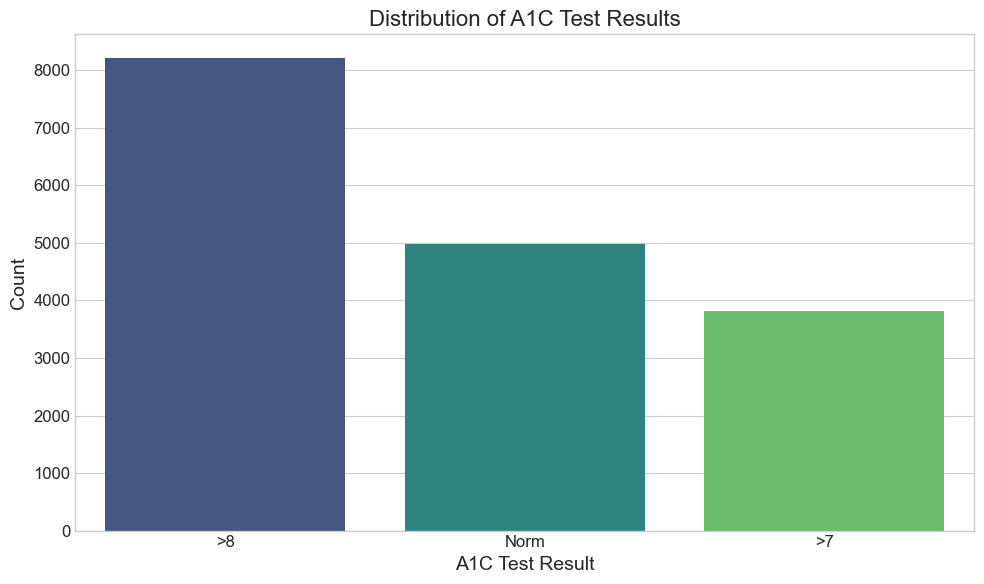

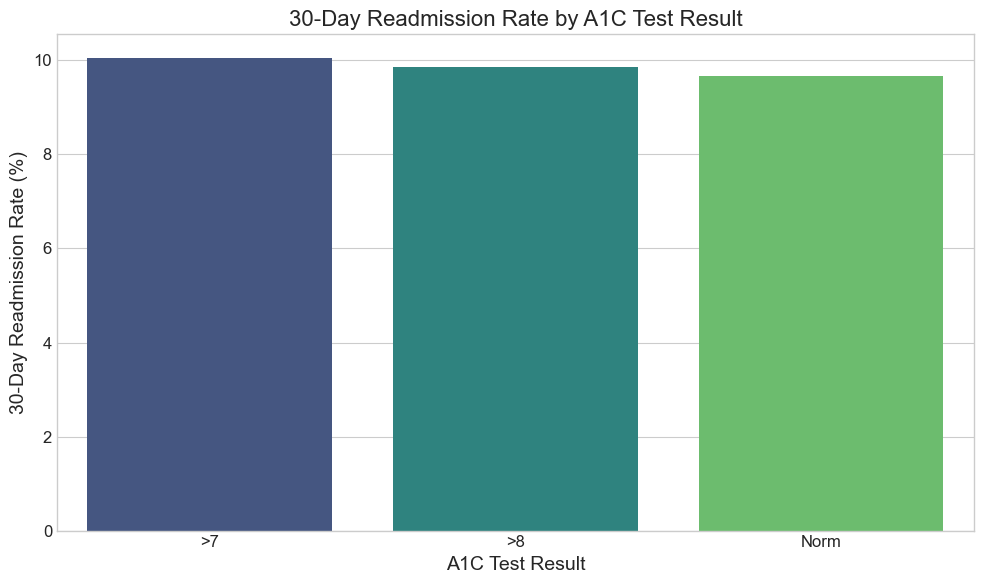

Readmission Rates by A1C Test Result (sorted by 30-day readmission rate):
readmitted  <30_days_rate  >30_days_rate  total_readmission_rate  total
A1Cresult                                                              
>7                  10.05          34.10                   44.15   3812
>8                   9.87          35.31                   45.18   8216
Norm                 9.66          32.04                   41.70   4990


In [ ]:
# Analyzing A1C test results
plt.figure(figsize=(10, 6))
a1c_counts = data['A1Cresult'].value_counts()
sns.barplot(x=a1c_counts.index, y=a1c_counts.values, palette='viridis')
plt.title('Distribution of A1C Test Results', fontsize=16)
plt.xlabel('A1C Test Result', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# Calculating readmission rates by A1C test results
a1c_readmission = calculate_readmission_rate(data, 'A1Cresult')
a1c_readmission = a1c_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=a1c_readmission.index, y=a1c_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by A1C Test Result', fontsize=16)
plt.xlabel('A1C Test Result', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()

print("Readmission Rates by A1C Test Result (sorted by 30-day readmission rate):")
print(a1c_readmission)

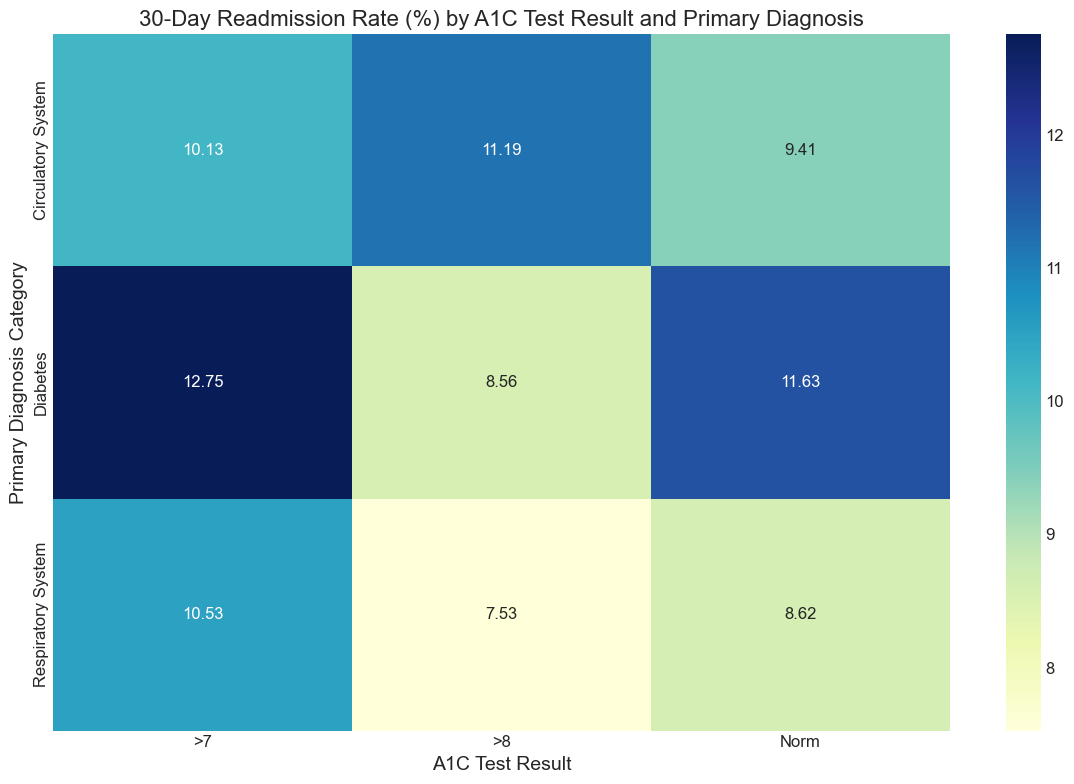

30-Day Readmission Rate (%) by A1C Test Result and Primary Diagnosis:
A1Cresult              >7     >8   Norm
diag_1_category                        
Circulatory System  10.13  11.19   9.41
Diabetes            12.75   8.56  11.63
Respiratory System  10.53   7.53   8.62


In [ ]:
# Analyzing the relationship between A1C test and diagnoses (key finding from the research paper)
# Creating a cross-tabulation of diagnosis category, A1C test, and readmission rate
cross_tab_data = data[data['diag_1_category'].isin(['Diabetes', 'Circulatory System', 'Respiratory System'])]

# Creating a pivot table
a1c_diag_pivot = pd.pivot_table(
    cross_tab_data, 
    values='readmitted_binary',
    index='diag_1_category',
    columns='A1Cresult',
    aggfunc='mean'
) * 100  # Convert to percentage

# Visualizing the relationship
plt.figure(figsize=(12, 8))
sns.heatmap(a1c_diag_pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('30-Day Readmission Rate (%) by A1C Test Result and Primary Diagnosis', fontsize=16)
plt.xlabel('A1C Test Result', fontsize=14)
plt.ylabel('Primary Diagnosis Category', fontsize=14)
plt.tight_layout()
plt.show()

print("30-Day Readmission Rate (%) by A1C Test Result and Primary Diagnosis:")
print(a1c_diag_pivot)

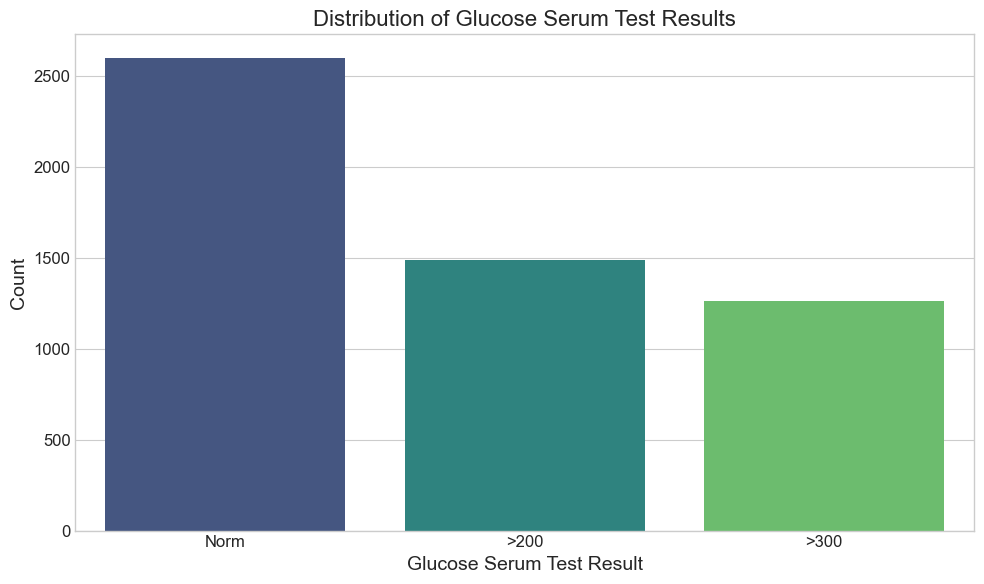

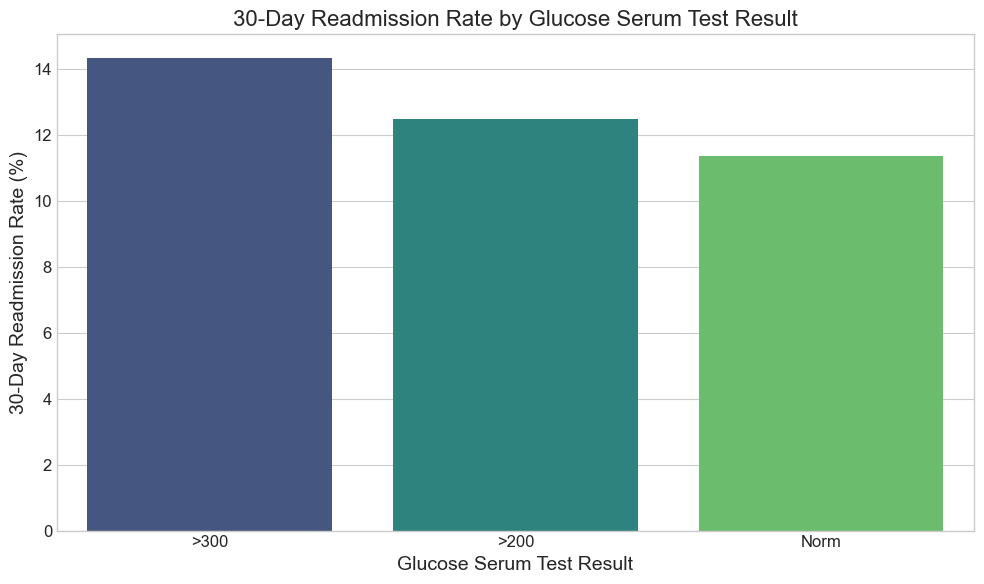

Readmission Rates by Glucose Serum Test Result (sorted by 30-day readmission rate):
readmitted     <30_days_rate  >30_days_rate  total_readmission_rate  total
max_glu_serum                                                             
>300                   14.32          41.22                   55.54   1264
>200                   12.46          35.69                   48.15   1485
Norm                   11.36          34.08                   45.44   2597


In [ ]:
# Analyzing glucose serum test results
plt.figure(figsize=(10, 6))
glu_counts = data['max_glu_serum'].value_counts()
sns.barplot(x=glu_counts.index, y=glu_counts.values, palette='viridis')
plt.title('Distribution of Glucose Serum Test Results', fontsize=16)
plt.xlabel('Glucose Serum Test Result', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# Calculating readmission rates by glucose serum test results
glu_readmission = calculate_readmission_rate(data, 'max_glu_serum')
glu_readmission = glu_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=glu_readmission.index, y=glu_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Glucose Serum Test Result', fontsize=16)
plt.xlabel('Glucose Serum Test Result', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()

print("Readmission Rates by Glucose Serum Test Result (sorted by 30-day readmission rate):")
print(glu_readmission)

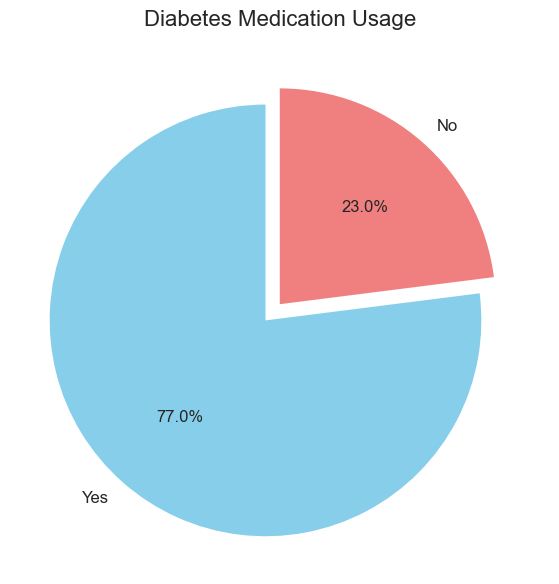

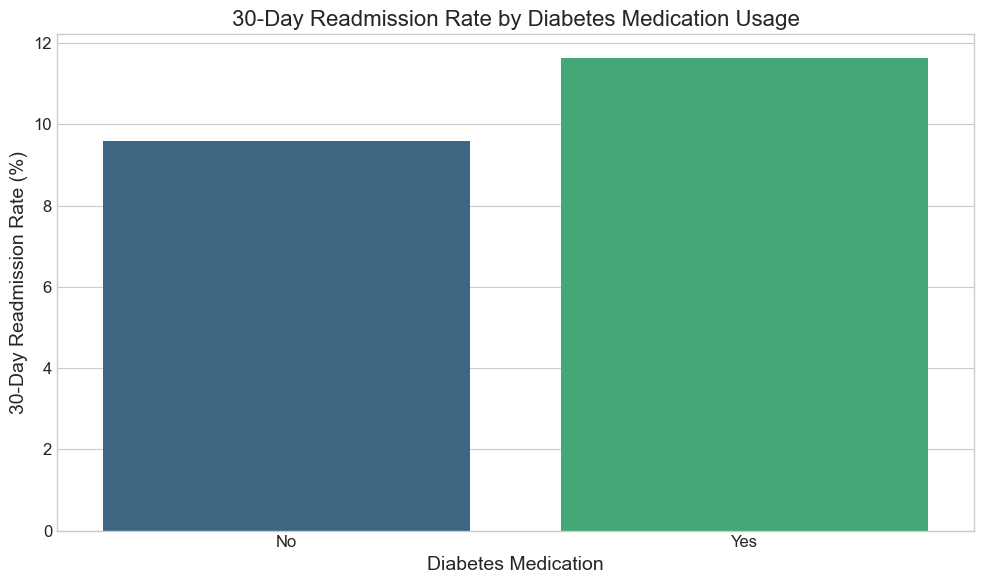

Readmission Rates by Diabetes Medication Usage:
readmitted   <30_days_rate  >30_days_rate  total_readmission_rate  total
diabetesMed                                                             
No                    9.60          30.88                   40.48  23403
Yes                  11.63          36.14                   47.76  78363


In [ ]:
# Analyzing diabetes medication usage
plt.figure(figsize=(10, 6))
diabetes_med_counts = data['diabetesMed'].value_counts()
plt.pie(diabetes_med_counts, labels=diabetes_med_counts.index, autopct='%1.1f%%', 
        startangle=90, explode=(0.1, 0), colors=['skyblue', 'lightcoral'])
plt.title('Diabetes Medication Usage', fontsize=16)
plt.tight_layout()
plt.show()

# Calculating readmission rates by diabetes medication usage
diabetes_med_readmission = calculate_readmission_rate(data, 'diabetesMed')

plt.figure(figsize=(10, 6))
sns.barplot(x=diabetes_med_readmission.index, y=diabetes_med_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Diabetes Medication Usage', fontsize=16)
plt.xlabel('Diabetes Medication', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()

print("Readmission Rates by Diabetes Medication Usage:")
print(diabetes_med_readmission)

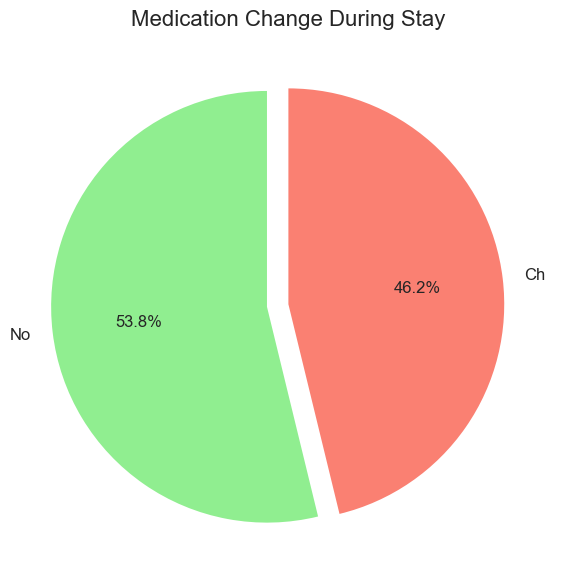

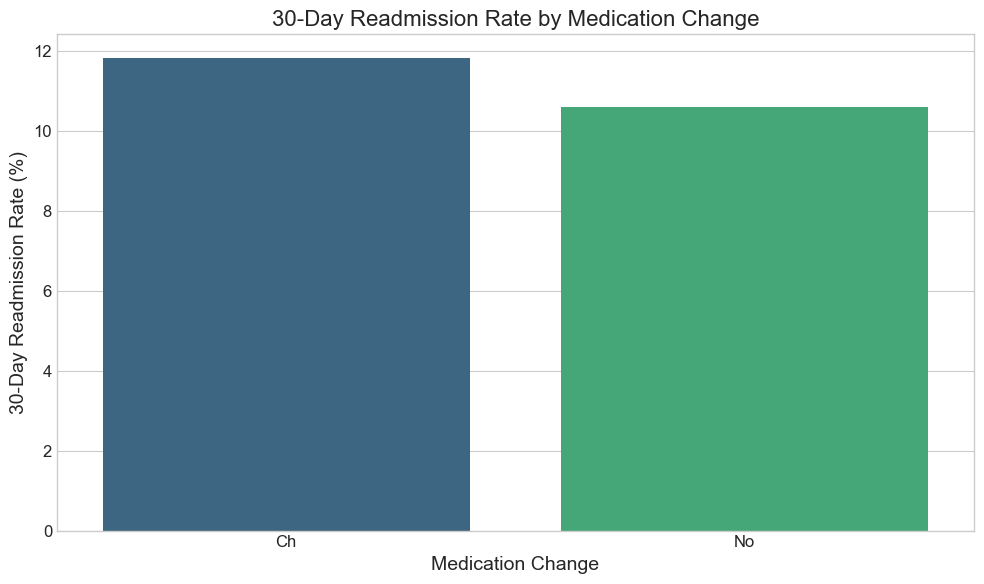

Readmission Rates by Medication Change:
readmitted  <30_days_rate  >30_days_rate  total_readmission_rate  total
change                                                                 
Ch                  11.82          36.74                   48.56  47011
No                  10.59          33.37                   43.96  54755


In [ ]:
# Analyzing medication change
plt.figure(figsize=(10, 6))
change_counts = data['change'].value_counts()
plt.pie(change_counts, labels=change_counts.index, autopct='%1.1f%%', 
        startangle=90, explode=(0.1, 0), colors=['lightgreen', 'salmon'])
plt.title('Medication Change During Stay', fontsize=16)
plt.tight_layout()
plt.show()

# Calculating readmission rates by medication change
change_readmission = calculate_readmission_rate(data, 'change')

plt.figure(figsize=(10, 6))
sns.barplot(x=change_readmission.index, y=change_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Medication Change', fontsize=16)
plt.xlabel('Medication Change', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()

print("Readmission Rates by Medication Change:")
print(change_readmission)

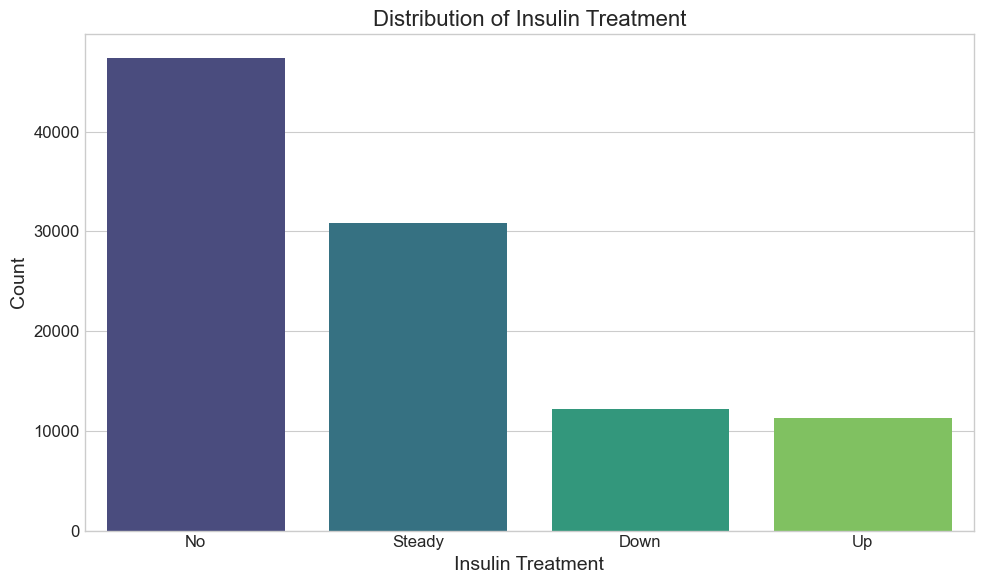

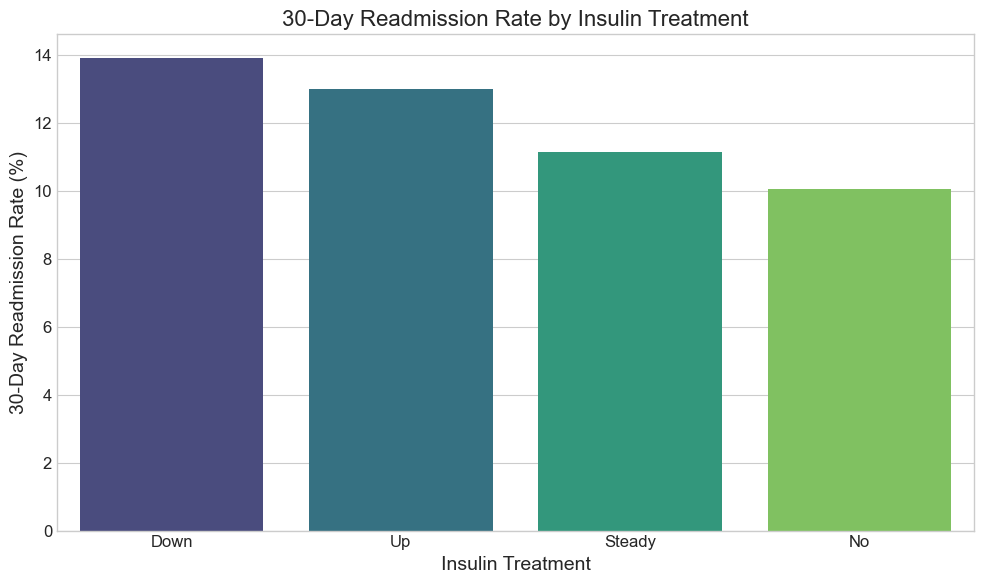

Readmission Rates by Insulin Treatment (sorted by 30-day readmission rate):
readmitted  <30_days_rate  >30_days_rate  total_readmission_rate  total
insulin                                                                
Down                13.90          38.89                   52.79  12218
Up                  12.99          38.55                   51.54  11316
Steady              11.13          33.98                   45.11  30849
No                  10.04          33.66                   43.70  47383


In [36]:
# Analyzing insulin usage
plt.figure(figsize=(10, 6))
insulin_counts = data['insulin'].value_counts()
sns.barplot(x=insulin_counts.index, y=insulin_counts.values, palette='viridis')
plt.title('Distribution of Insulin Treatment', fontsize=16)
plt.xlabel('Insulin Treatment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# Calculating readmission rates by insulin usage
insulin_readmission = calculate_readmission_rate(data, 'insulin')
insulin_readmission = insulin_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=insulin_readmission.index, y=insulin_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Insulin Treatment', fontsize=16)
plt.xlabel('Insulin Treatment', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()

print("Readmission Rates by Insulin Treatment (sorted by 30-day readmission rate):")
print(insulin_readmission)

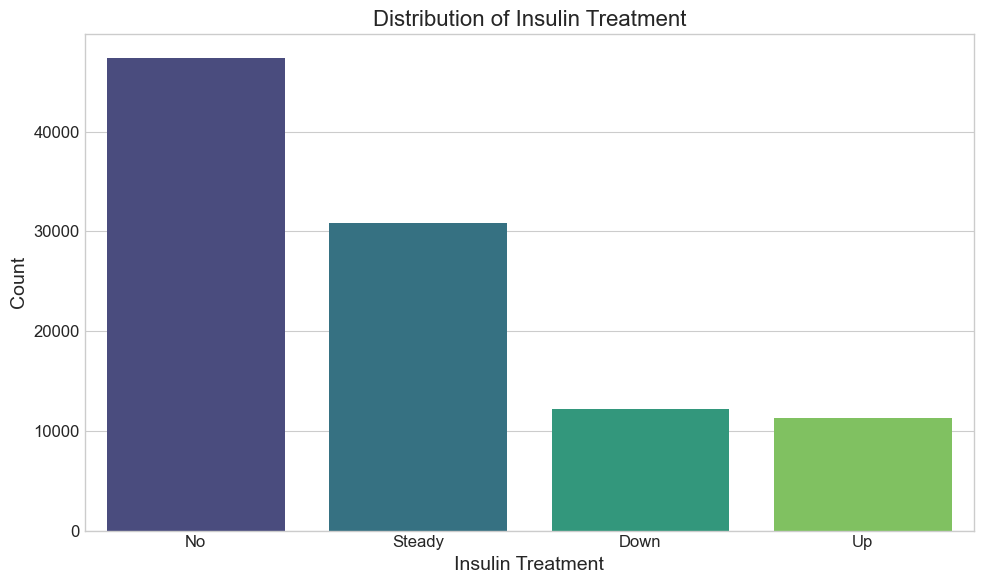

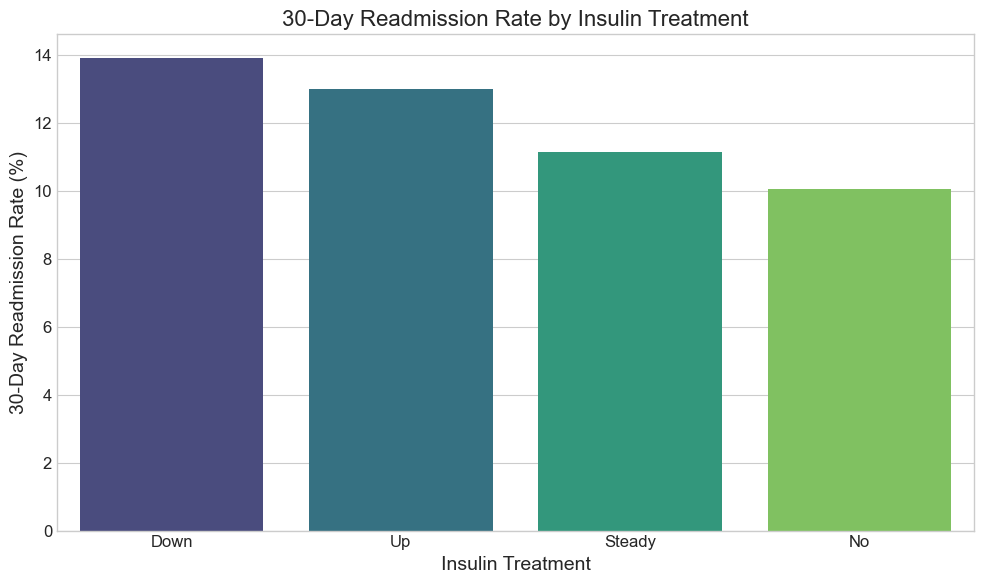

Readmission Rates by Insulin Treatment (sorted by 30-day readmission rate):
readmitted  <30_days_rate  >30_days_rate  total_readmission_rate  total
insulin                                                                
Down                13.90          38.89                   52.79  12218
Up                  12.99          38.55                   51.54  11316
Steady              11.13          33.98                   45.11  30849
No                  10.04          33.66                   43.70  47383


In [ ]:
# Analyzing insulin usage
plt.figure(figsize=(10, 6))
insulin_counts = data['insulin'].value_counts()
sns.barplot(x=insulin_counts.index, y=insulin_counts.values, palette='viridis')
plt.title('Distribution of Insulin Treatment', fontsize=16)
plt.xlabel('Insulin Treatment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# Calculating readmission rates by insulin usage
insulin_readmission = calculate_readmission_rate(data, 'insulin')
insulin_readmission = insulin_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=insulin_readmission.index, y=insulin_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Insulin Treatment', fontsize=16)
plt.xlabel('Insulin Treatment', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.tight_layout()
plt.show()

print("Readmission Rates by Insulin Treatment (sorted by 30-day readmission rate):")
print(insulin_readmission)

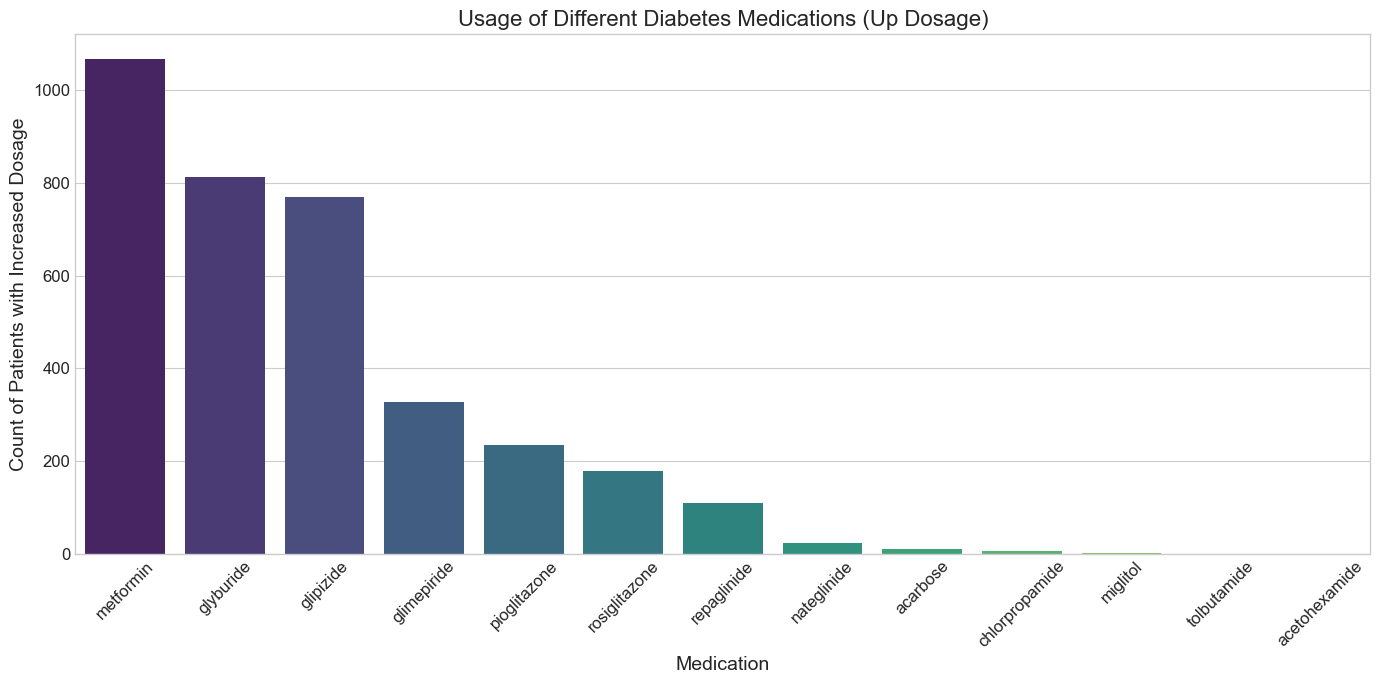

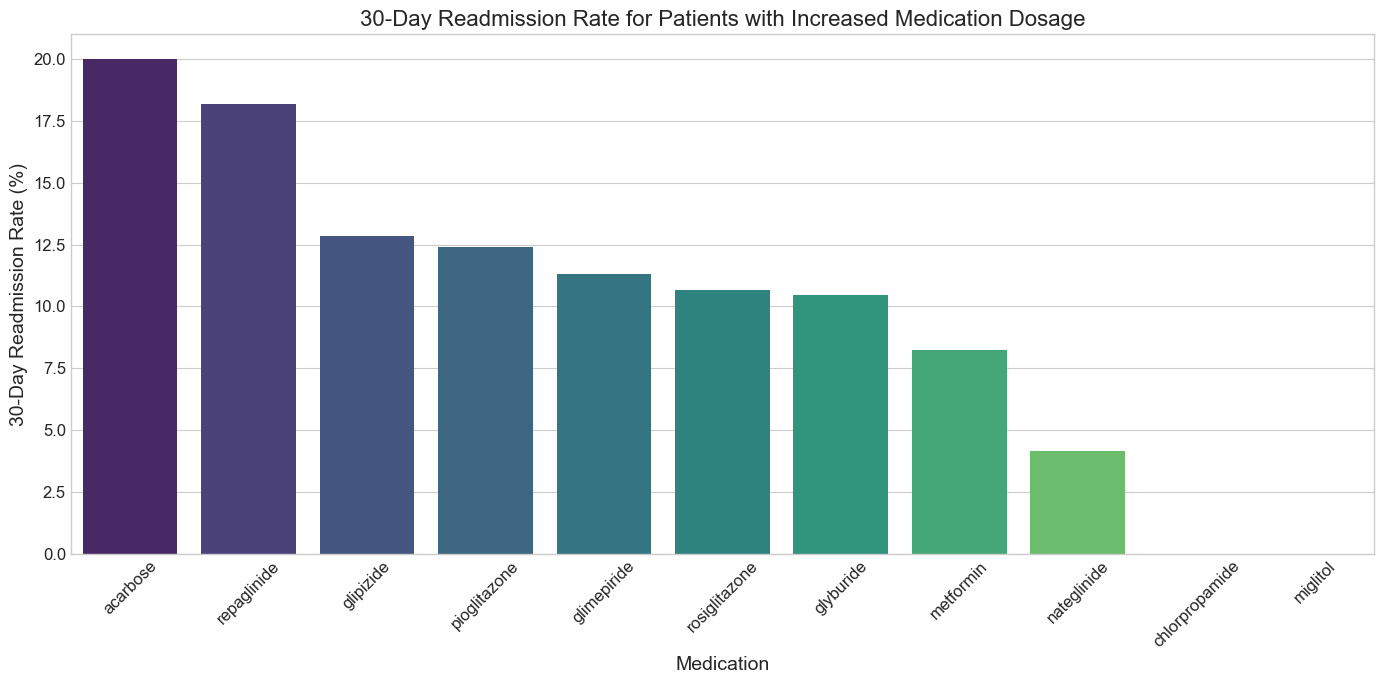

30-Day Readmission Rates for Patients with Increased Medication Dosage (sorted):
        Medication  Readmission_Rate
9         acarbose             20.00
1      repaglinide             18.18
5        glipizide             12.86
7     pioglitazone             12.39
4      glimepiride             11.31
8    rosiglitazone             10.67
6        glyburide             10.47
0        metformin              8.25
2      nateglinide              4.17
3   chlorpropamide              0.00
10        miglitol              0.00


In [ ]:
# Getting the list of medication columns
med_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol']

# Creating a plot to show the usage of different medications
plt.figure(figsize=(14, 7))
med_usage = {}
for med in med_columns:
    # Counts occurrences of different values
    med_usage[med] = data[med].value_counts()

# Creating a DataFrame for easier plotting
med_usage_df = pd.DataFrame({med: usage.get('Up', 0) for med, usage in med_usage.items()}, index=[0]).T
med_usage_df.columns = ['Count']
med_usage_df = med_usage_df.sort_values('Count', ascending=False)

sns.barplot(x=med_usage_df.index, y=med_usage_df['Count'], palette='viridis')
plt.title('Usage of Different Diabetes Medications (Up Dosage)', fontsize=16)
plt.xlabel('Medication', fontsize=14)
plt.ylabel('Count of Patients with Increased Dosage', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating readmission rates for patients with increased dosage of each medication
med_readmission_rates = {}
for med in med_columns:
    # Filtering data for patients with increased dosage
    med_up_data = data[data[med] == 'Up']
    if len(med_up_data) > 0:
        # Calculating 30-day readmission rate
        med_readmission_rates[med] = (med_up_data['readmitted_binary'].mean() * 100).round(2)

# Creating a DataFrame for easier plotting
if med_readmission_rates:
    med_rates_df = pd.DataFrame(list(med_readmission_rates.items()), columns=['Medication', 'Readmission_Rate'])
    med_rates_df = med_rates_df.sort_values('Readmission_Rate', ascending=False)

    plt.figure(figsize=(14, 7))
    sns.barplot(x='Medication', y='Readmission_Rate', data=med_rates_df, palette='viridis')
    plt.title('30-Day Readmission Rate for Patients with Increased Medication Dosage', fontsize=16)
    plt.xlabel('Medication', fontsize=14)
    plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("30-Day Readmission Rates for Patients with Increased Medication Dosage (sorted):")
    print(med_rates_df)

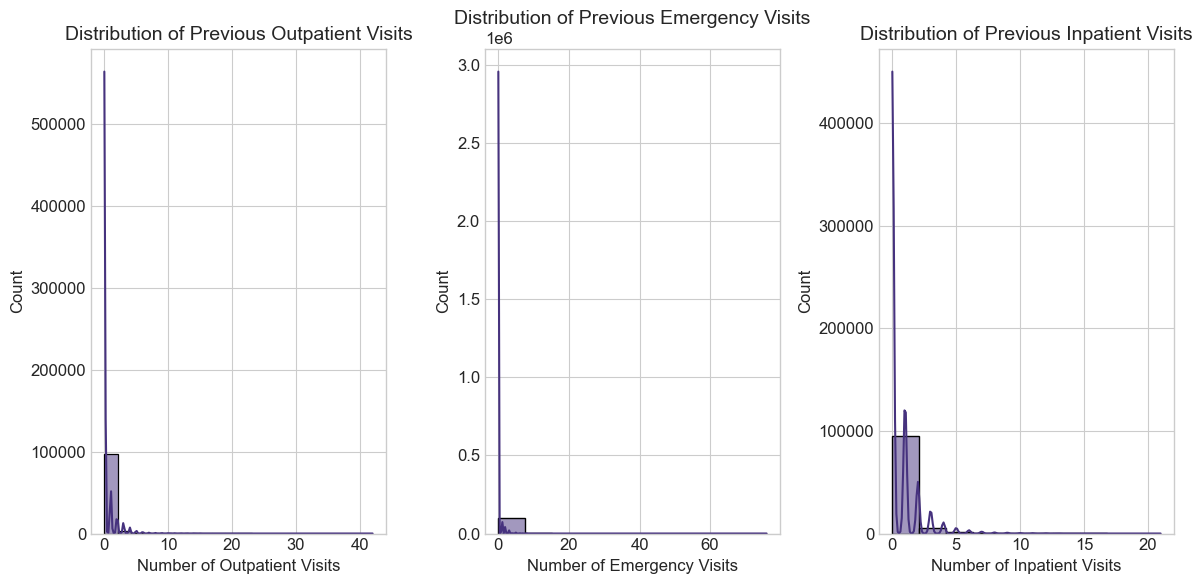

In [ ]:
# Analyziing the distribution of previous visits
plt.figure(figsize=(12, 6))

sns.histplot(data['number_outpatient'], bins=20, kde=True)
plt.title('Distribution of Previous Outpatient Visits', fontsize=14)
plt.xlabel('Number of Outpatient Visits', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Analyzing the distribution of previous emergency visits
plt.subplot(1, 3, 2)
sns.histplot(data['number_emergency'], bins=10, kde=True)
plt.title('Distribution of Previous Emergency Visits', fontsize=14)
plt.xlabel('Number of Emergency Visits', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Analyzing the distribution of previous inpatient visits
plt.subplot(1, 3, 3)
sns.histplot(data['number_inpatient'], bins=10, kde=True)
plt.title('Distribution of Previous Inpatient Visits', fontsize=14)
plt.xlabel('Number of Inpatient Visits', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

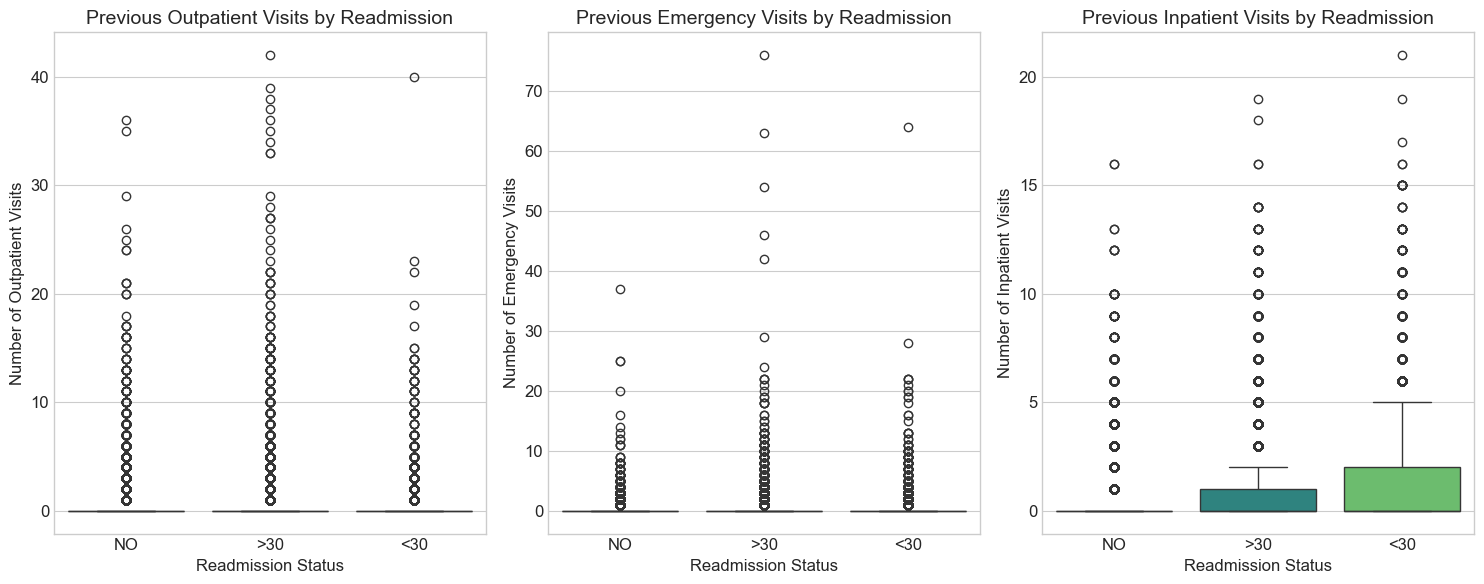

Previous Visits Statistics by Readmission Status:
           number_outpatient              number_emergency               \
                        mean median   std             mean median   std   
readmitted                                                                
<30                     0.44    0.0  1.30             0.36    0.0  1.37   
>30                     0.50    0.0  1.54             0.28    0.0  1.19   
NO                      0.27    0.0  1.03             0.11    0.0  0.52   

           number_inpatient               
                       mean median   std  
readmitted                                
<30                    1.22    0.0  1.95  
>30                    0.84    0.0  1.39  
NO                     0.38    0.0  0.86  

Correlations between Previous Visits and 30-Day Readmission:
                   correlation   p_value
number_outpatient         0.02  1.66e-09
number_emergency          0.06  8.30e-84
number_inpatient          0.17  0.00e+00


In [ ]:
# Analyzing relationship between previous visits and readmission
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='readmitted', y='number_outpatient', data=data, palette='viridis')
plt.title('Previous Outpatient Visits by Readmission', fontsize=14)
plt.xlabel('Readmission Status', fontsize=12)
plt.ylabel('Number of Outpatient Visits', fontsize=12)

plt.subplot(1, 3, 2)
sns.boxplot(x='readmitted', y='number_emergency', data=data, palette='viridis')
plt.title('Previous Emergency Visits by Readmission', fontsize=14)
plt.xlabel('Readmission Status', fontsize=12)
plt.ylabel('Number of Emergency Visits', fontsize=12)

plt.subplot(1, 3, 3)
sns.boxplot(x='readmitted', y='number_inpatient', data=data, palette='viridis')
plt.title('Previous Inpatient Visits by Readmission', fontsize=14)
plt.xlabel('Readmission Status', fontsize=12)
plt.ylabel('Number of Inpatient Visits', fontsize=12)

plt.tight_layout()
plt.show()

# Calculating statistics for previous visits by readmission status
visit_cols = ['number_outpatient', 'number_emergency', 'number_inpatient']
visits_by_readmission = data.groupby('readmitted')[visit_cols].agg(['mean', 'median', 'std']).round(2)
print("Previous Visits Statistics by Readmission Status:")
print(visits_by_readmission)

# Calculating correlations between previous visits and 30-day readmission
correlations = {}
for col in visit_cols:
    corr, p_value = stats.pointbiserialr(data['readmitted_binary'], data[col])
    correlations[col] = {'correlation': corr.round(3), 'p_value': p_value}

print("\nCorrelations between Previous Visits and 30-Day Readmission:")
correlations_df = pd.DataFrame.from_dict(correlations, orient='index')
print(correlations_df)

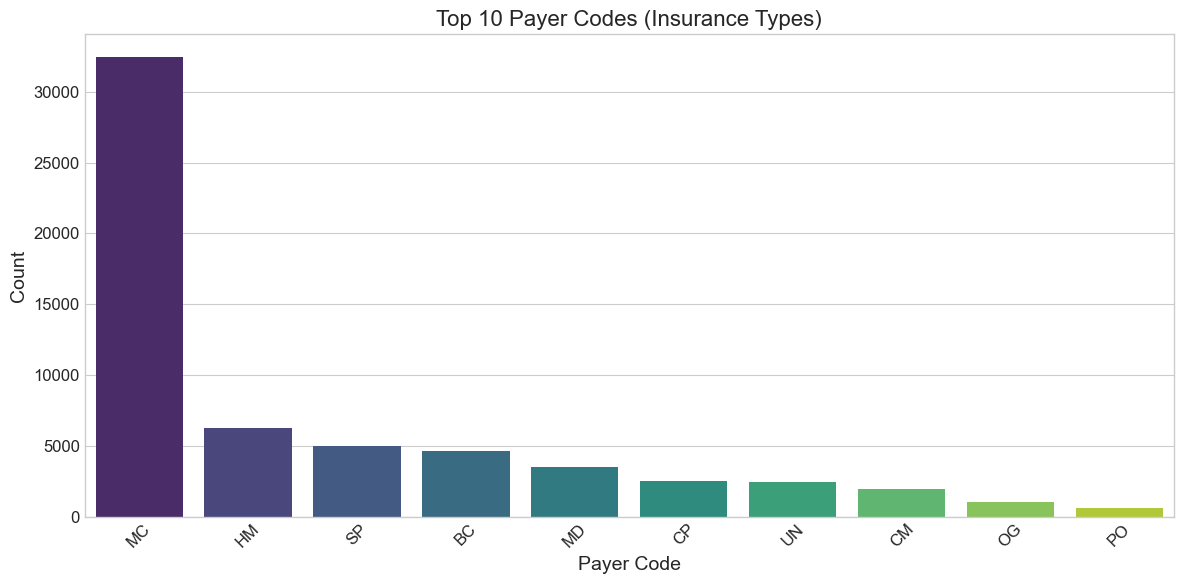

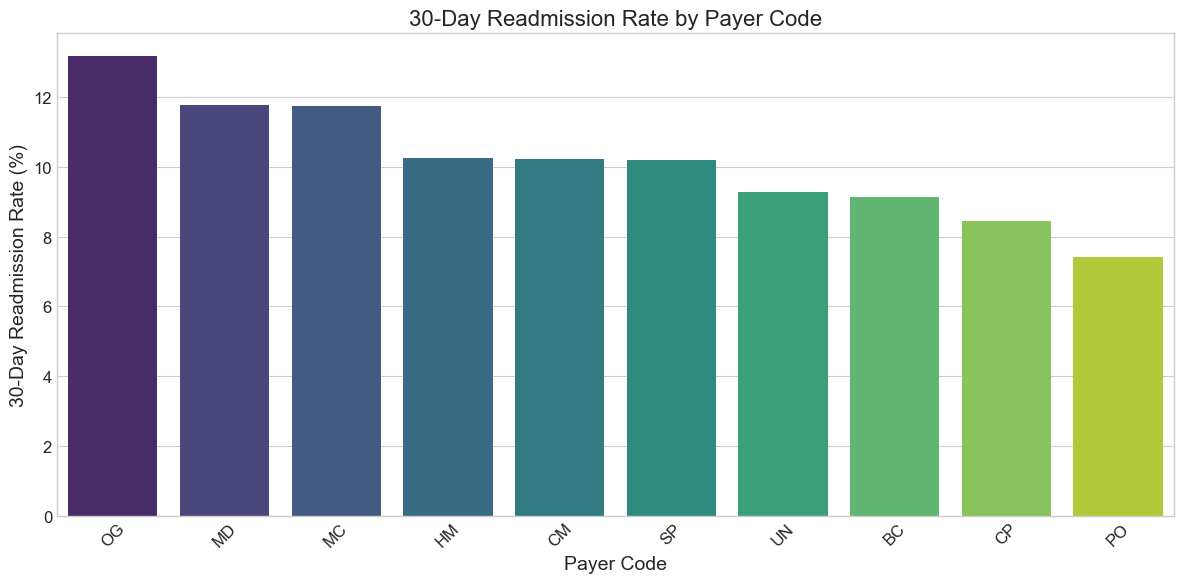

Readmission Rates by Payer Code (sorted by 30-day readmission rate):
readmitted  <30_days_rate  >30_days_rate  total_readmission_rate  total
payer_code                                                             
OG                  13.17          32.24                   45.40   1033
MD                  11.78          35.65                   47.42   3532
MC                  11.75          36.94                   48.68  32439
HM                  10.26          36.98                   47.24   6274
CM                  10.22          34.12                   44.35   1937
SP                  10.19          37.33                   47.51   5007
UN                   9.27          28.43                   37.70   2448
BC                   9.15          27.95                   37.10   4655
CP                   8.45          30.83                   39.28   2533
PO                   7.43          24.32                   31.76    592


In [ ]:
# Getting the most common payer codes
top_payers = data['payer_code'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
payer_counts = data[data['payer_code'].isin(top_payers)]['payer_code'].value_counts()
sns.barplot(x=payer_counts.index, y=payer_counts.values, palette='viridis')
plt.title('Top 10 Payer Codes (Insurance Types)', fontsize=16)
plt.xlabel('Payer Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating readmission rates by payer code
payer_data = data[data['payer_code'].isin(top_payers)]
payer_readmission = calculate_readmission_rate(payer_data, 'payer_code')
payer_readmission = payer_readmission.sort_values('<30_days_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=payer_readmission.index, y=payer_readmission['<30_days_rate'], palette='viridis')
plt.title('30-Day Readmission Rate by Payer Code', fontsize=16)
plt.xlabel('Payer Code', fontsize=14)
plt.ylabel('30-Day Readmission Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Readmission Rates by Payer Code (sorted by 30-day readmission rate):")
print(payer_readmission)

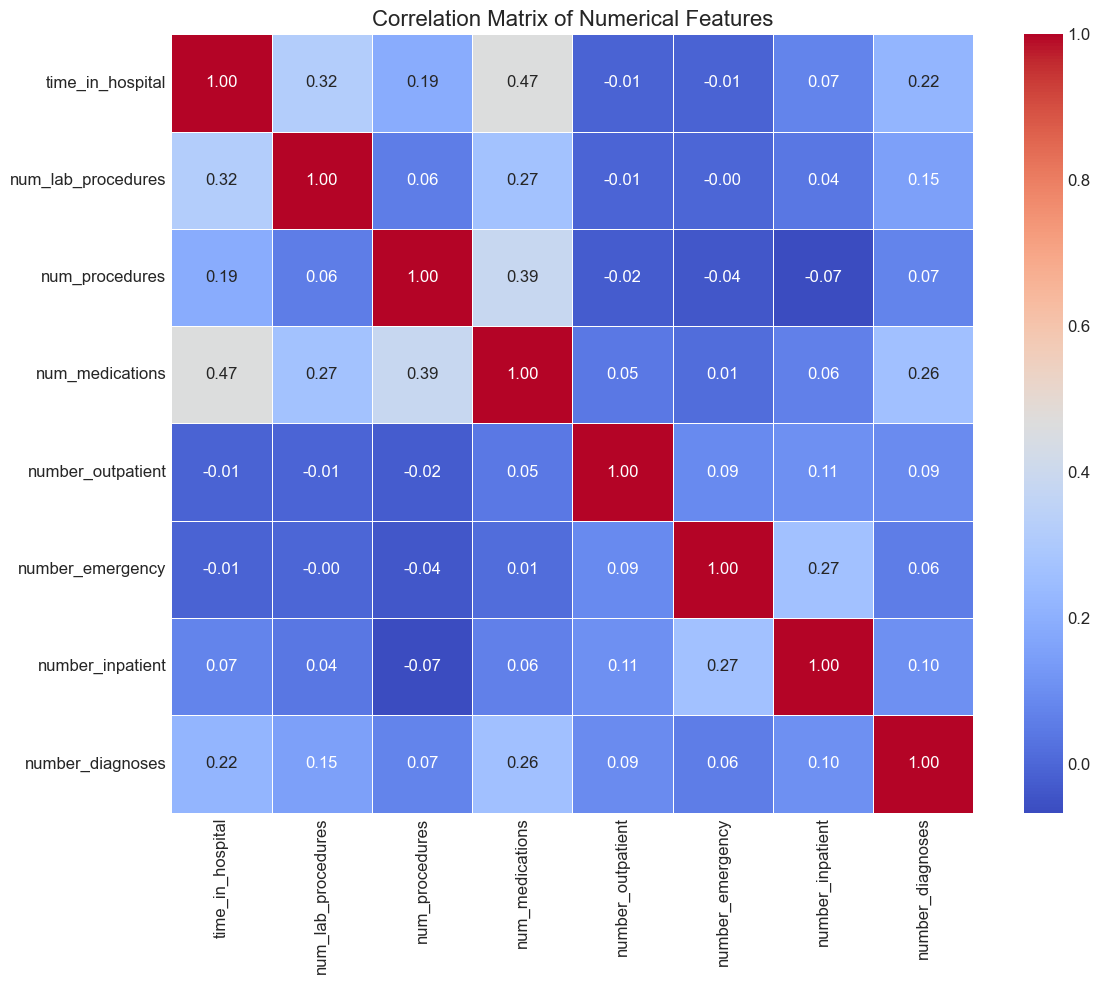

In [ ]:
# Selecting numerical features
numerical_features = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
    'num_medications', 'number_outpatient', 'number_emergency', 
    'number_inpatient', 'number_diagnoses'
]

# Creating correlation matrix
correlation_matrix = data[numerical_features].corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

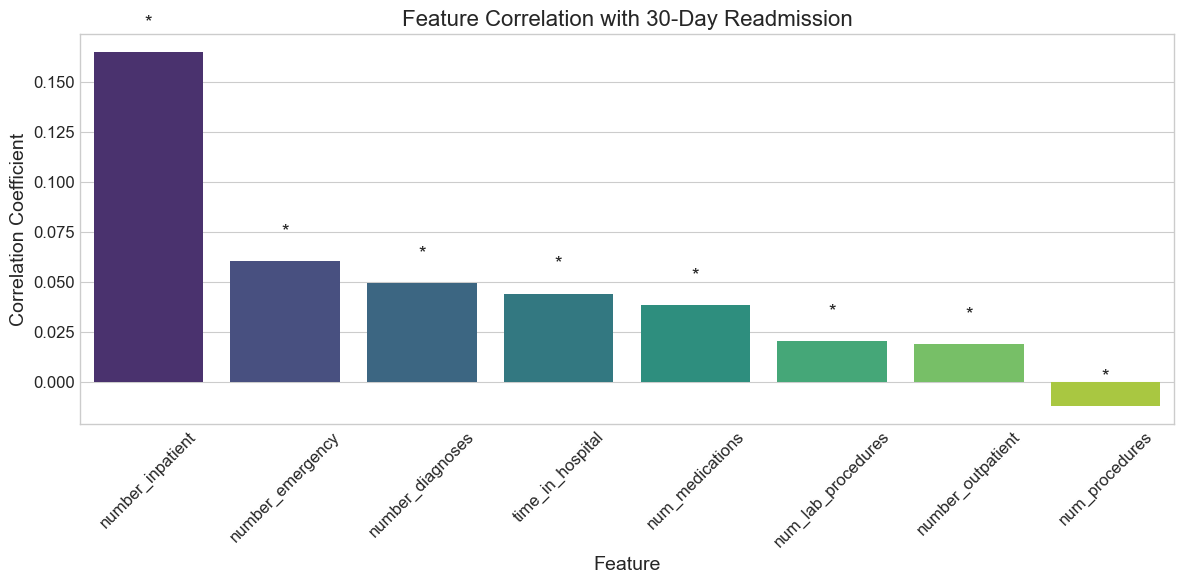

Feature Correlations with 30-Day Readmission (sorted):
                    correlation   p_value
number_inpatient           0.17  0.00e+00
number_emergency           0.06  8.30e-84
number_diagnoses           0.05  2.74e-56
time_in_hospital           0.04  3.45e-45
num_medications            0.04  1.41e-34
num_lab_procedures         0.02  8.21e-11
number_outpatient          0.02  1.66e-09
num_procedures            -0.01  9.60e-05


In [ ]:
# Calculating point-biserial correlation with readmission (binary target)
readmission_correlations = {}
for feature in numerical_features:
    corr, p_value = stats.pointbiserialr(data['readmitted_binary'], data[feature])
    readmission_correlations[feature] = {'correlation': corr.round(4), 'p_value': p_value}

# Creating DataFrame for better visualization
correlation_df = pd.DataFrame.from_dict(readmission_correlations, orient='index')
correlation_df = correlation_df.sort_values('correlation', ascending=False)

# Plot the correlations with readmission
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=correlation_df.index, y='correlation', data=correlation_df, palette='viridis')
plt.title('Feature Correlation with 30-Day Readmission', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45)

# Adding significance indicators
for i, feature in enumerate(correlation_df.index):
    if correlation_df.loc[feature, 'p_value'] < 0.05:
        ax.text(i, correlation_df.loc[feature, 'correlation'] + 0.01, '*', 
                ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

print("Feature Correlations with 30-Day Readmission (sorted):")
print(correlation_df)

Summary Statistics by Readmission Status:
           time_in_hospital              num_lab_procedures                \
                       mean median   std               mean median    std   
readmitted                                                                  
<30                    4.77    4.0  3.03              44.23   45.0  19.28   
>30                    4.50    4.0  2.99              43.84   45.0  19.57   
NO                     4.25    3.0  2.96              42.38   44.0  19.80   

           num_procedures              num_medications               \
                     mean median   std            mean median   std   
readmitted                                                            
<30                  1.28    1.0  1.64           16.90   16.0  8.10   
>30                  1.25    1.0  1.67           16.28   15.0  7.62   
NO                   1.41    1.0  1.74           15.67   14.0  8.43   

           number_outpatient              number_emergency          

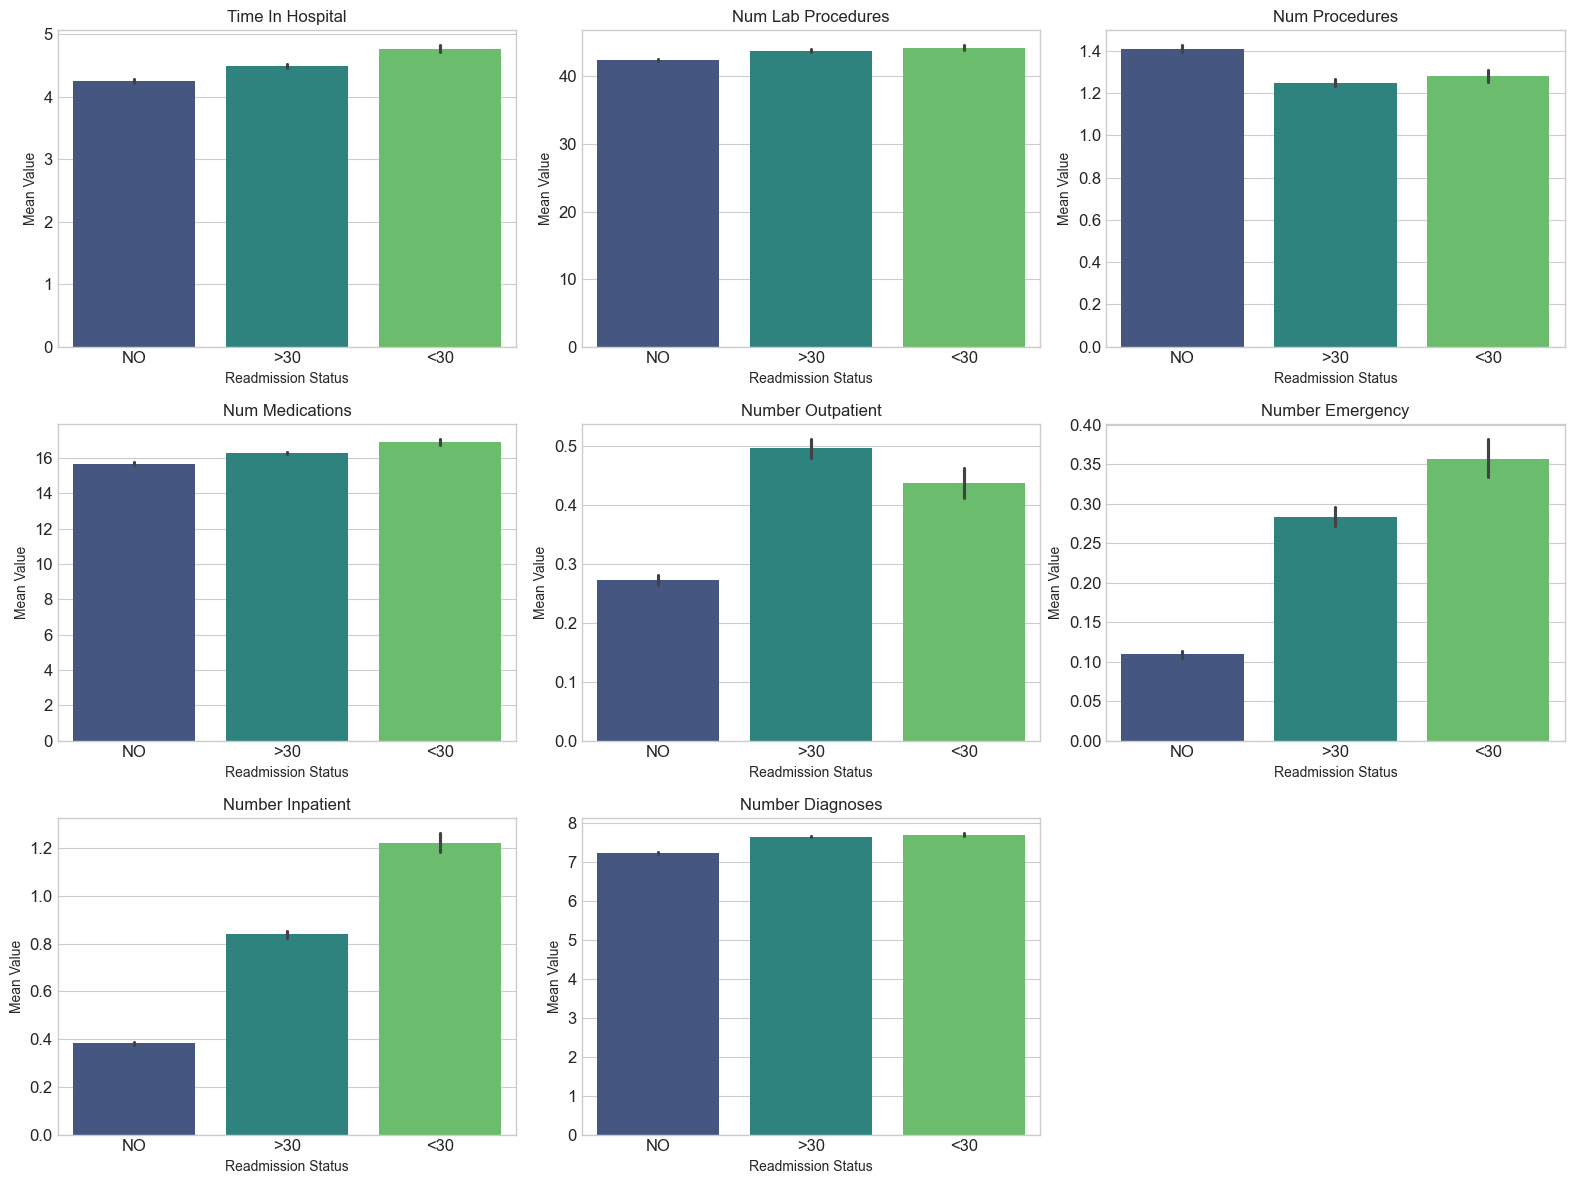

In [ ]:
# Creating summary statistics for all numerical features by readmission status
summary_stats = data.groupby('readmitted')[numerical_features].agg(['mean', 'median', 'std']).round(2)
print("Summary Statistics by Readmission Status:")
print(summary_stats)

# more visual comparison
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.barplot(x='readmitted', y=feature, data=data, palette='viridis')
    plt.title(f'{feature.replace("_", " ").title()}', fontsize=12)
    plt.xlabel('Readmission Status', fontsize=10)
    plt.ylabel('Mean Value', fontsize=10)

plt.tight_layout()
plt.show()

In [31]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type', 'discharge_disposition', 'admission_source',
       'readmitted_bin

# Key Findings from Exploratory Data Analysis

This document summarizes the key insights from our exploratory data analysis of the diabetes hospital readmission dataset. These findings will inform our feature selection and modeling approach for predicting hospital readmissions.

## Target Variable Distribution
- 11.16% of patients were readmitted within 30 days, 34.93% were readmitted after 30 days, and 53.91% were not readmitted
- This creates a class imbalance for the binary prediction task (11.16% positive cases for 30-day readmission)
- Total readmission rate (both <30 days and >30 days) is 46.09%

## Demographic Factors
- **Age**: The 20-30 age group has the highest 30-day readmission rate (14.24%), followed by elderly patients (80-90 age group at 12.08%)
- **Gender**: Slight difference in readmission rates between females (11.25%) and males (11.06%)
- **Race**: Caucasian (11.29%) and African American (11.22%) patients have the highest 30-day readmission rates, while other races have lower rates

## Hospital Stay Factors
- **Length of Stay**: Patients readmitted within 30 days had longer average hospital stays (4.77 days) compared to non-readmitted patients (4.25 days)
- **Admission Type**: Emergency admissions had the highest 30-day readmission rate (11.52%), followed by urgent admissions (11.18%)
- **Admission Source**: HMO referrals (15.51%) and court/law enforcement (12.50%) had the highest 30-day readmission rates
- **Discharge Disposition**: Patients discharged to rehabilitation facilities had the highest readmission rate (27.70%), followed by discharges to other inpatient care facilities (20.86%)

## Diagnosis Factors
- **Primary Diagnosis**: Diabetes as a primary diagnosis has a higher 30-day readmission rate (12.98%) compared to circulatory system diagnoses (11.19%)
- **Number of Diagnoses**: Higher number of diagnoses is associated with higher readmission rates (statistically significant, p < 0.05)
- Patients readmitted within 30 days had an average of 7.69 diagnoses versus 7.22 for non-readmitted patients

## A1C Testing and Glucose Testing
- **A1C Test Results**: Patients with A1C results >7% showed higher 30-day readmission rates (10.05%) than those with >8% (9.87%)
- **Glucose Testing**: Patients with high glucose levels (>300) had higher 30-day readmission rates (14.32%) than patients with normal glucose levels (11.36%)
- Interesting relationship between A1C results and diagnosis category: diabetic patients with A1C >7% had 12.75% readmission rate versus 8.56% for those with A1C >8%

## Medication Factors
- **Diabetes Medication**: Patients on diabetes medication had higher 30-day readmission rates (11.63%) than those without (9.60%)
- **Medication Change**: Patients with medication changes during hospitalization had higher readmission rates (11.82%) than those without changes (10.59%)
- **Insulin**: Decreased insulin dosage was associated with the highest readmission rate (13.90%), followed by increased dosage (12.99%)
- **Specific Medications**: Increased dosage of acarbose (20.00%) and repaglinide (18.18%) were associated with the highest readmission rates

## Previous Visits Impact
- **Previous Inpatient Visits**: Strong predictor of readmission (correlation 0.17, p < 0.001) - patients readmitted within 30 days had an average of 1.22 previous inpatient visits versus 0.38 for non-readmitted patients
- **Previous Emergency Visits**: Moderate predictor of readmission (correlation 0.06, p < 0.001)
- **Previous Outpatient Visits**: Weak but significant predictor of readmission (correlation 0.02, p < 0.001)

## Most Influential Features
- Previous inpatient visits (correlation 0.17) - strongest predictor
- Previous emergency visits (correlation 0.06)
- Number of diagnoses (correlation 0.05)
- Hospital stay duration (correlation 0.04)
- Number of medications (correlation 0.04)

## Key Insights for Model Development
1. **Healthcare History Features**: Previous hospital encounters (especially inpatient) are strong predictors and should be emphasized in the model
2. **Clinical Complexity**: Number of diagnoses, medications, and procedures can capture patient complexity and readmission risk
3. **Medication Management**: Changes in medication regimen, especially insulin and specific diabetes medications, are important indicators
4. **Discharge Planning**: Discharge destination is highly associated with readmission risk and should be included
5. **Class Imbalance**: The 11.16% positive class rate for 30-day readmission will require appropriate handling in the modeling phase (sampling techniques or class weights)
6. **Feature Engineering**: Consider creating interaction features between diagnoses and medications, as well as between age groups and clinical factors
7. **Risk Stratification**: Different age groups and admission types show varying readmission risks, suggesting potential for stratified models